In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [17]:
cols = ['time',
'loc_cell_name',
'no_records',
'unique_users',
'unique_active_users_dl',
'unique_active_users_ul',
'active_traf_records_dl',
'active_traf_records_ul',
'sum_btraf_bearer_bytes_dl',
'sum_btraf_bearer_bytes_ul',
'sum_kpi_core_create_pdp_response_time_samples',
'sum_kpi_core_create_pdp_same_ip_samples',
'sum_kpi_core_create_session_new_ip_samples',
'sum_kpi_core_create_session_response_time_samples',
'mean_kpi_core_create_session_response_time_val',
'sum_kpi_core_create_session_same_ip_samples',
'mean_kpi_core_modify_bearer_response_time_val',
'sum_kpi_core_s1_ho_attempts_samples',
'mean_kpi_core_s1_ho_attempts_val',
'sum_kpi_core_s1_ho_samples',          
'mean_kpi_ran_abnormal_lte_conn_rel_ratio_val',     
'mean_kpi_ran_cqi_val',
'sum_kpi_ran_dl_credits_samples',
'sum_kpi_ran_dl_non_hs_tx_power_samples',
'mean_kpi_ran_ecn0_val',
'mean_kpi_ran_per_active_ue_dl_mean_val',
'sum_traf_facebook_communication_bytes_dl',
 'sum_traf_facebook_communication_bytes_ul',
 'mean_traf_facebook_communication_pkt_loss_net',
 'mean_traf_facebook_communication_pkt_loss_net_dl',
 'mean_traf_facebook_communication_pkt_loss_net_ul',
 'mean_traf_facebook_communication_pkt_loss_term',
 'mean_traf_facebook_communication_pkt_loss_term_dl',
 'mean_traf_facebook_communication_pkt_loss_term_ul',
 'mean_traf_facebook_communication_rtt_net',
 'mean_traf_facebook_communication_rtt_term',
 'sum_traf_facebook_communication_samples',
 'sum_traf_facebook_communication_tcp_bytes_dl',
 'sum_traf_facebook_communication_tcp_bytes_ul',
 'mean_traf_facebook_communication_tcp_rwin_max',
 'mean_traf_facebook_communication_tcp_tp_class_dl',
 'mean_traf_facebook_communication_tcp_tp_class_ul',
 'mean_traf_facebook_communication_tcp_tp_dl',
 'mean_traf_facebook_communication_tcp_tp_ul',
 'sum_traf_facebook_socialnetworking_bytes_dl',
 'sum_traf_facebook_socialnetworking_bytes_ul',
 'mean_traf_facebook_socialnetworking_pkt_loss_net',
 'mean_traf_facebook_socialnetworking_pkt_loss_net_dl',
 'mean_traf_facebook_socialnetworking_pkt_loss_net_ul',
 'mean_traf_facebook_socialnetworking_pkt_loss_term',
 'mean_traf_facebook_socialnetworking_pkt_loss_term_dl',
 'mean_traf_facebook_socialnetworking_pkt_loss_term_ul',
 'mean_traf_facebook_socialnetworking_rtt_net',
 'mean_traf_facebook_socialnetworking_rtt_term',
 'sum_traf_facebook_socialnetworking_samples',
 'sum_traf_facebook_socialnetworking_tcp_bytes_dl',
 'sum_traf_facebook_socialnetworking_tcp_bytes_ul',
 'mean_traf_facebook_socialnetworking_tcp_rwin_max',
 'mean_traf_facebook_socialnetworking_tcp_tp_class_dl',
 'mean_traf_facebook_socialnetworking_tcp_tp_class_ul',
 'mean_traf_facebook_socialnetworking_tcp_tp_dl',
 'mean_traf_facebook_socialnetworking_tcp_tp_ul',
 'mean_traf_facebook_socialnetworking_wp_acc_succ',
 'mean_traf_facebook_socialnetworking_wp_size',
 'mean_traf_facebook_socialnetworking_wp_succ',
 'mean_traf_facebook_socialnetworking_wp_time',
 'sum_traf_facebook_system_bytes_dl',
 'sum_traf_facebook_system_bytes_ul',
 'sum_traf_facebook_system_samples',
 'sum_traf_facebook_video_bytes_dl',
 'sum_traf_facebook_video_bytes_ul',
 'mean_traf_facebook_video_pkt_loss_net',
 'mean_traf_facebook_video_pkt_loss_net_dl',
 'mean_traf_facebook_video_pkt_loss_term',
 'mean_traf_facebook_video_pkt_loss_term_dl',
 'mean_traf_facebook_video_rtt_net',
 'mean_traf_facebook_video_rtt_term',
 'sum_traf_facebook_video_samples',
 'sum_traf_facebook_video_tcp_bytes_dl',
 'sum_traf_facebook_video_tcp_bytes_ul',
 'mean_traf_facebook_video_tcp_rwin_max',
 'mean_traf_facebook_video_tcp_tp_class_dl',
 'mean_traf_facebook_video_tcp_tp_dl',     
           ]
df = pd.read_csv("/home/esihakh/projects/peak_data/0717-1016/area_jewish_south_0831-1016.csv",usecols = cols)

In [19]:
df = df.drop('loc_cell_name', 1)


In [20]:
df=df.dropna(axis=1,how='all')


In [21]:
class SetColAsIndex(TransformerMixin):
    def __init__(self, col):
        self.col = col

    def transform(self, X, **transform_params):
        X.index = X.loc[:, self.col].apply(lambda x: pd.to_datetime(x))
        return X

    def fit(self, X, y=None, **fit_params):
        return self


class FilterCompleteDays(TransformerMixin):
    def __init__(self, n=96):
        self.n = n

    def transform(self, X, **transform_params):
        #print X.groupby(X.index.date).transform('count')
        X = X.ix[X.groupby(X.index.date).transform('count').iloc[:, 0] >= self.n]
        return X

    def fit(self, X, y=None, **fit_params):
        return self

class FilterDays(TransformerMixin):
    def __init__(self, days=None):
        self.days = days

    def transform(self, X, **transform_params):
        X = X.iloc[pd.Series(X.index.day).isin(self.days).values, :]
        return X

    def fit(self, X, y=None, **fit_params):
        return self


class FilterWeekEnd(TransformerMixin):
    def transform(self, X, **transform_params):
        X = X[X.index.weekday > 4]
        return X

    def fit(self, X, y=None, **fit_params):
        return self


class SortTimeSeries(TransformerMixin):
    def transform(self, X, **transform_params):
        X = X.sort_index()
        return X

    def fit(self, X, y=None, **fit_params):
        return self


class RemoveDuplicateRow(TransformerMixin):
    def __init__(self, sample_period):
        self.sample_period = sample_period

    def transform(self, X, **transform_params):
        X = X.resample(self.sample_period, 'mean').fillna(method='bfill')
        return X

    def fit(self, X, y=None, **fit_params):
        return self

In [25]:
process_pipeline = make_pipeline(SetColAsIndex('time'),FilterCompleteDays(96),
                                SortTimeSeries())
df = process_pipeline.fit_transform(df)
df = df.drop('time', 1)

KeyError: 'the label [time] is not in the [columns]'

In [26]:
# combine timeseries of different cells
df = df.groupby(df.index).sum()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10938 entries, 2016-08-31 07:45:00 to 2016-10-16 22:00:00
Data columns (total 81 columns):
no_records                                              10938 non-null int64
unique_users                                            10938 non-null int64
unique_active_users_dl                                  10938 non-null int64
unique_active_users_ul                                  10938 non-null int64
active_traf_records_dl                                  10938 non-null int64
active_traf_records_ul                                  10938 non-null int64
sum_btraf_bearer_bytes_dl                               10938 non-null float64
sum_btraf_bearer_bytes_ul                               10938 non-null float64
sum_kpi_core_create_pdp_response_time_samples           10915 non-null float64
sum_kpi_core_create_pdp_same_ip_samples                 7983 non-null float64
sum_kpi_core_create_session_new_ip_samples              10922 non-null float64


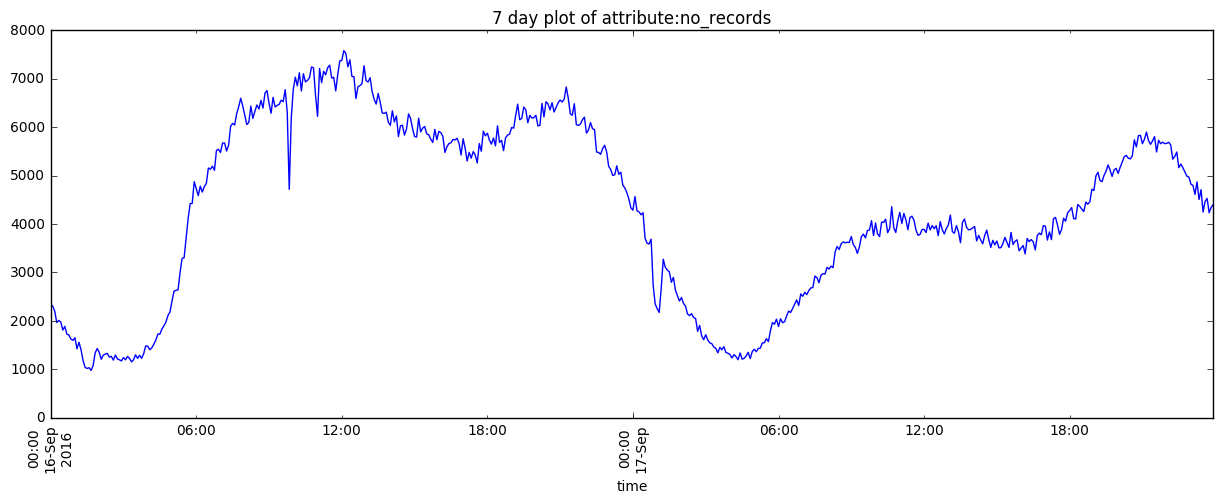

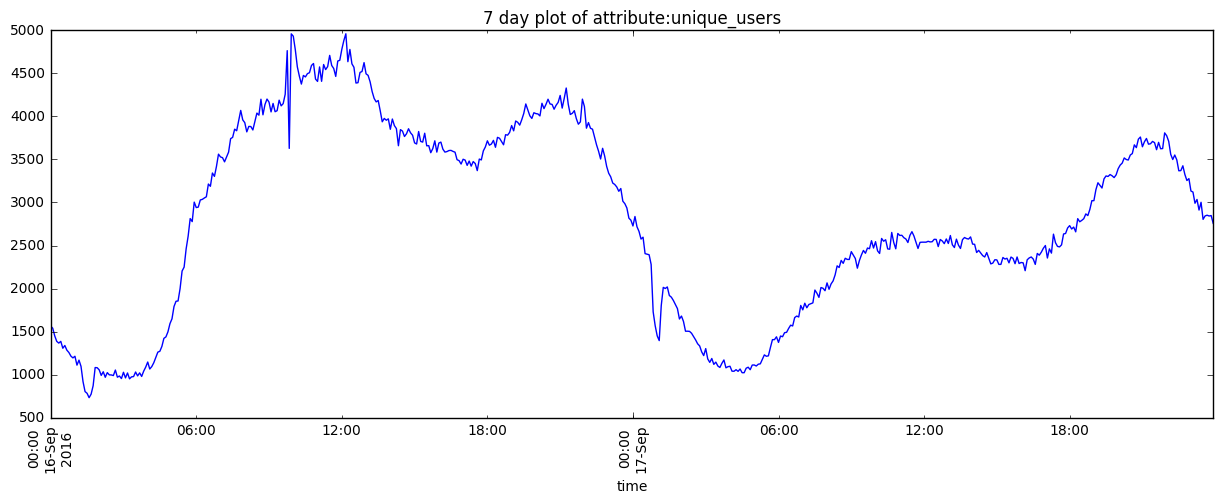

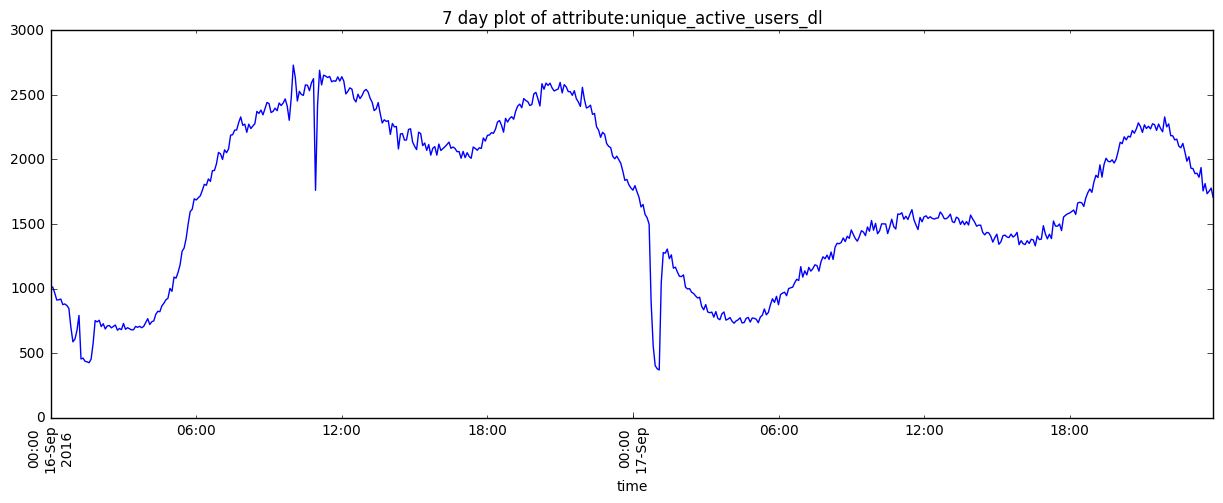

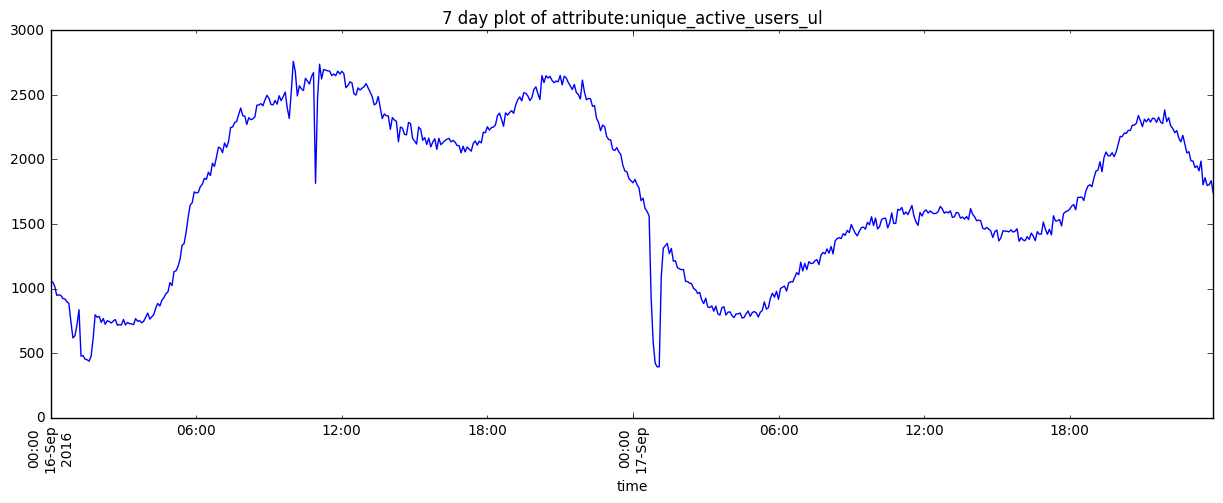

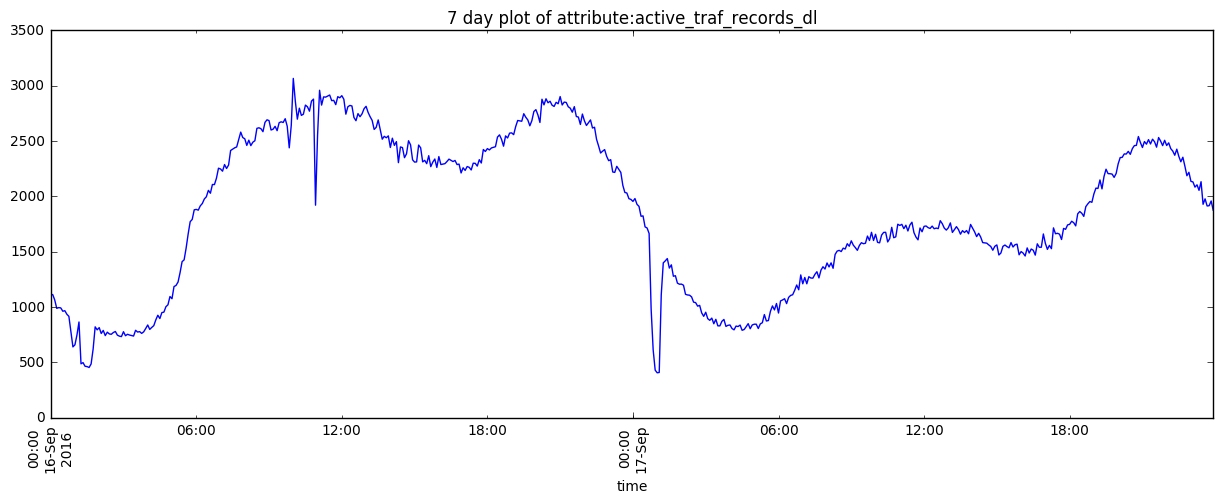

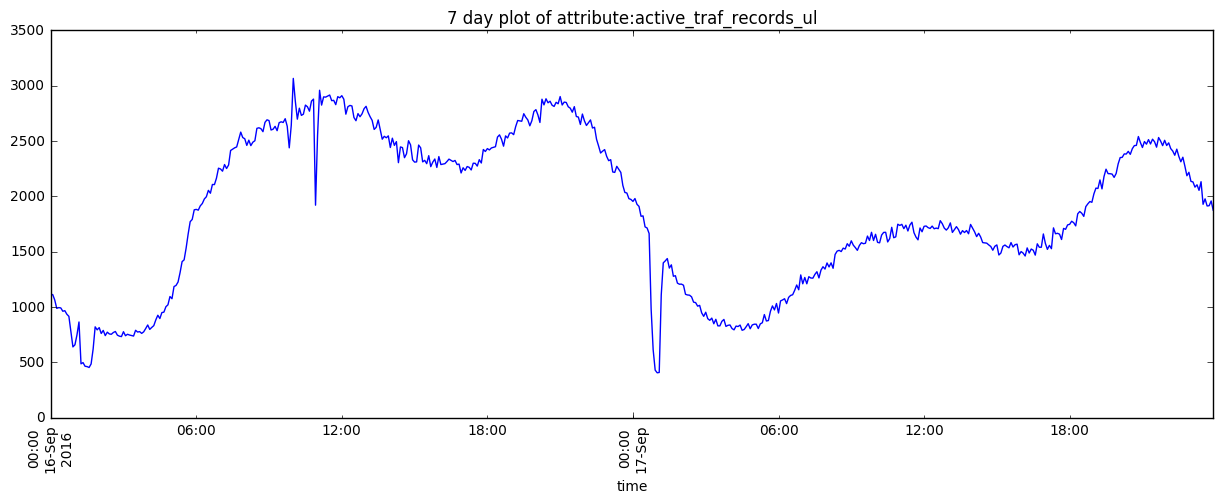

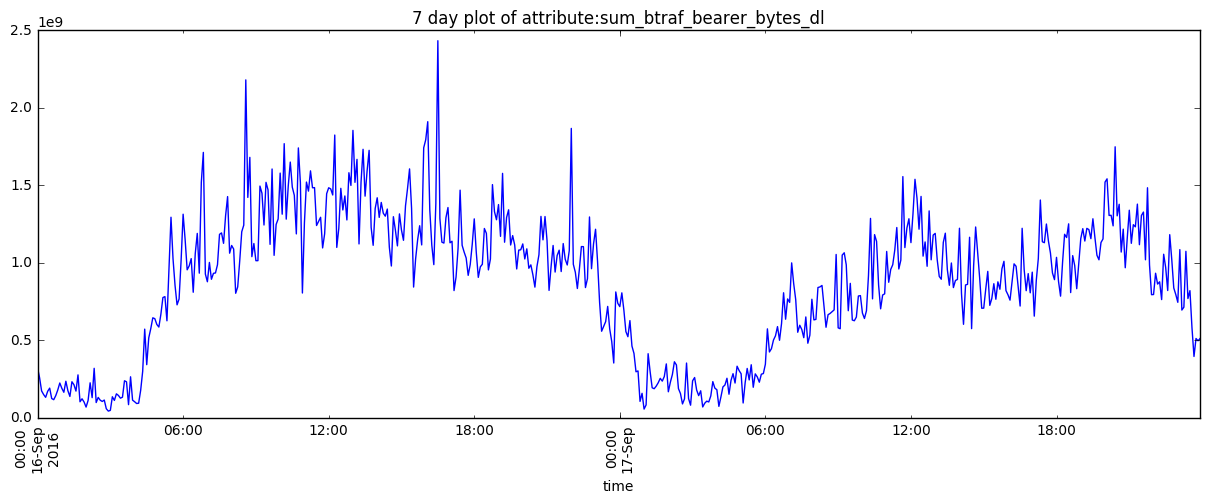

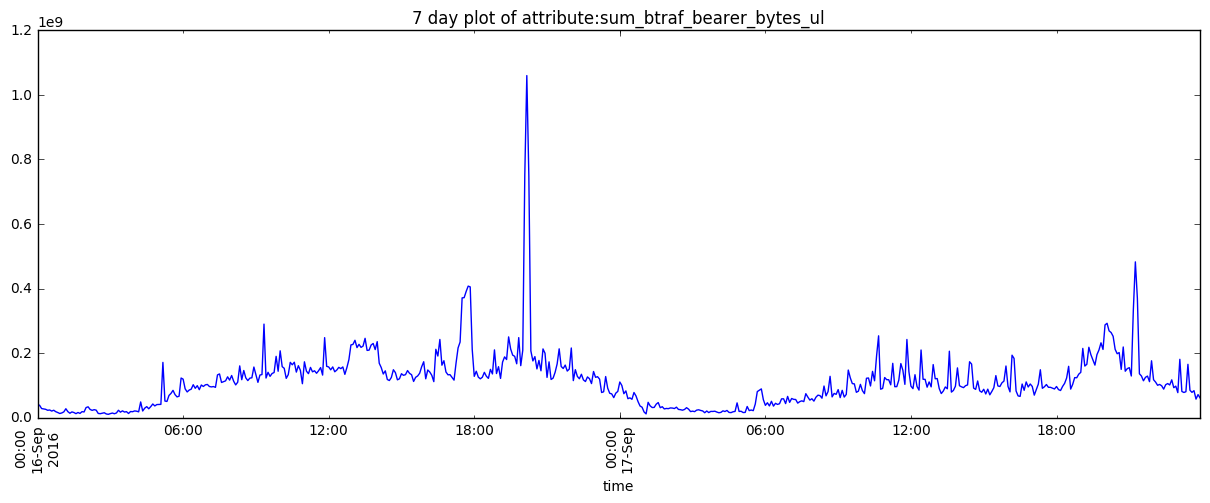

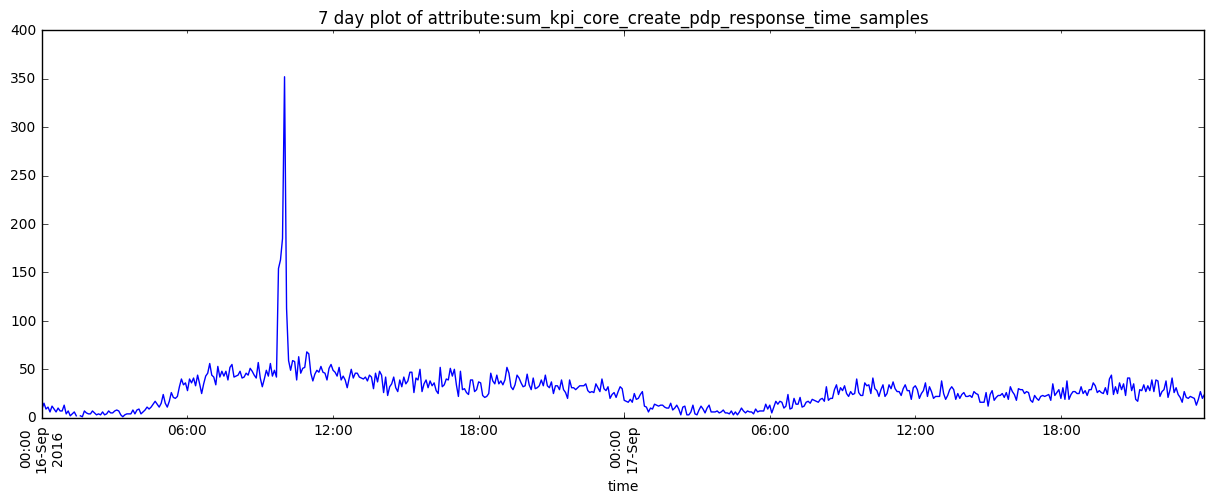

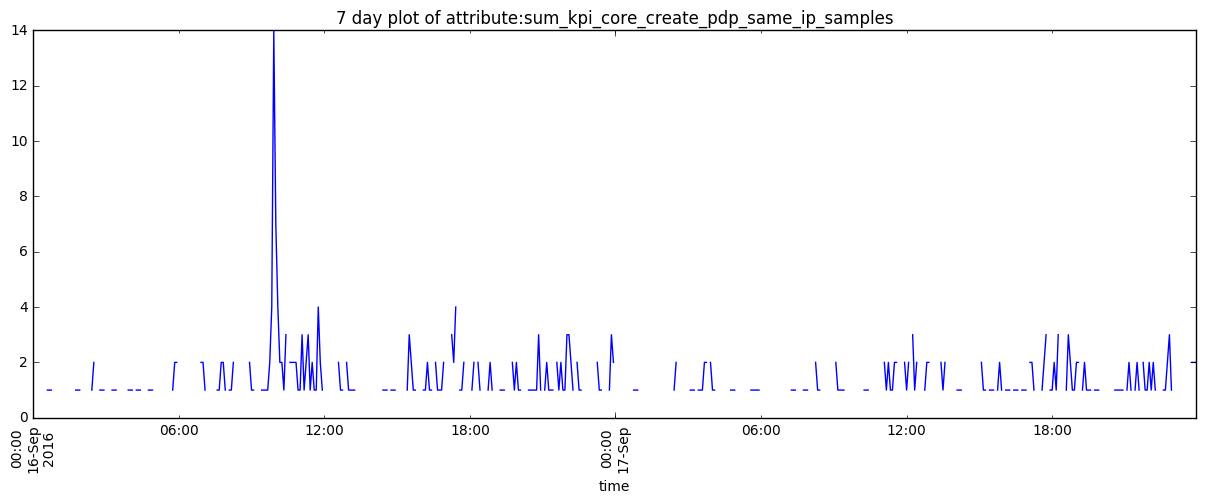

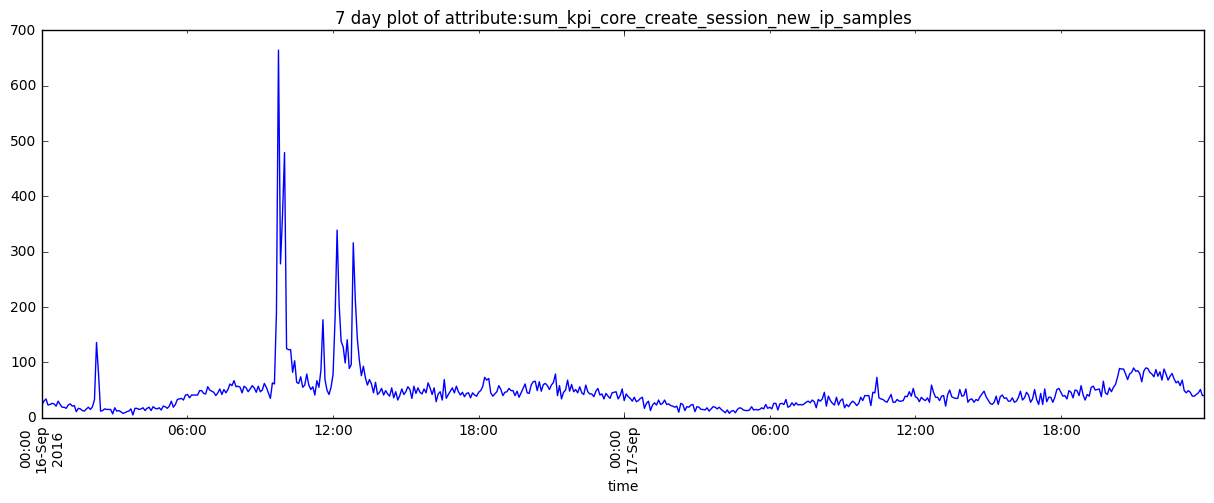

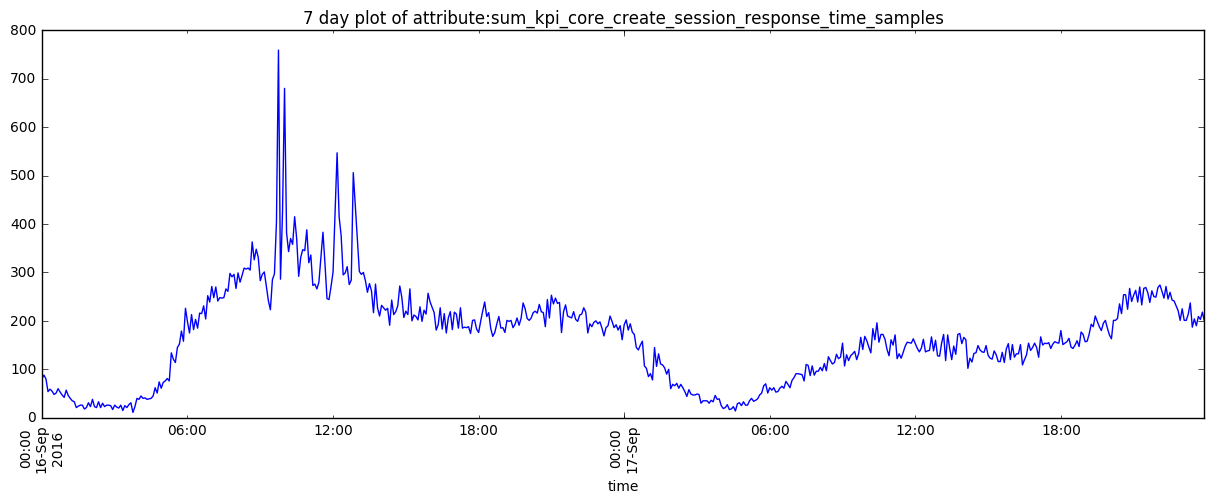

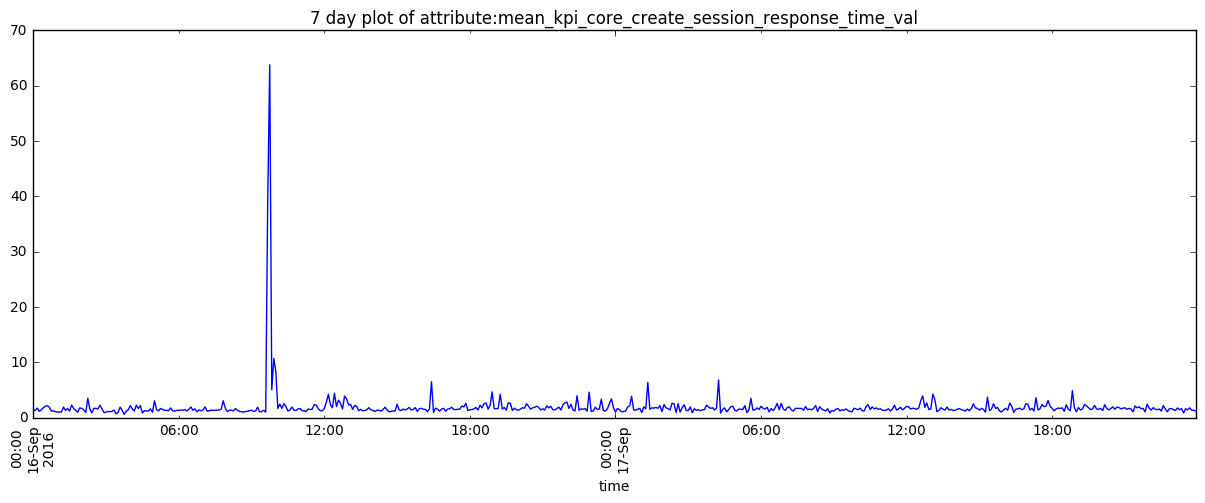

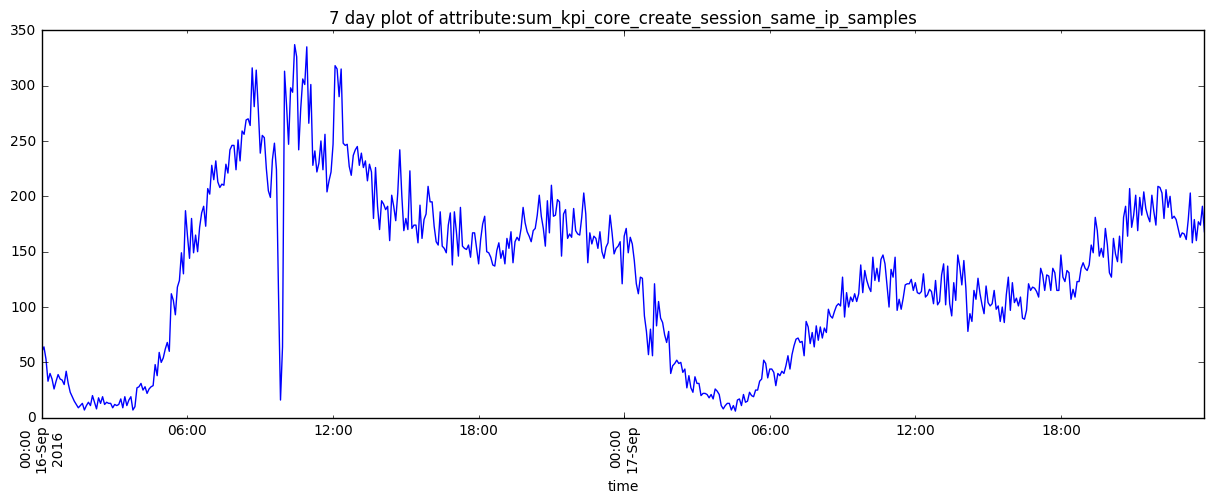

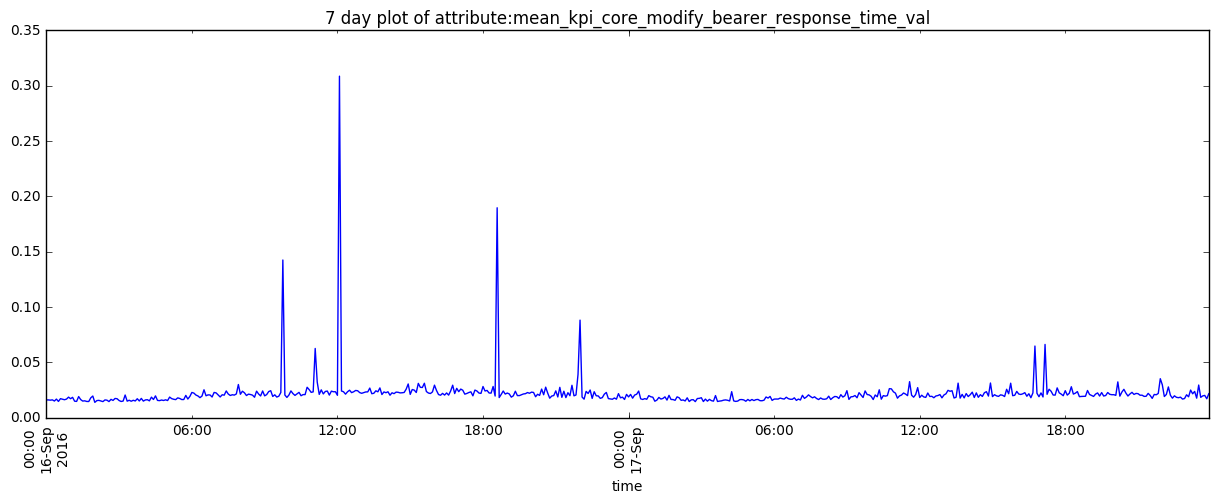

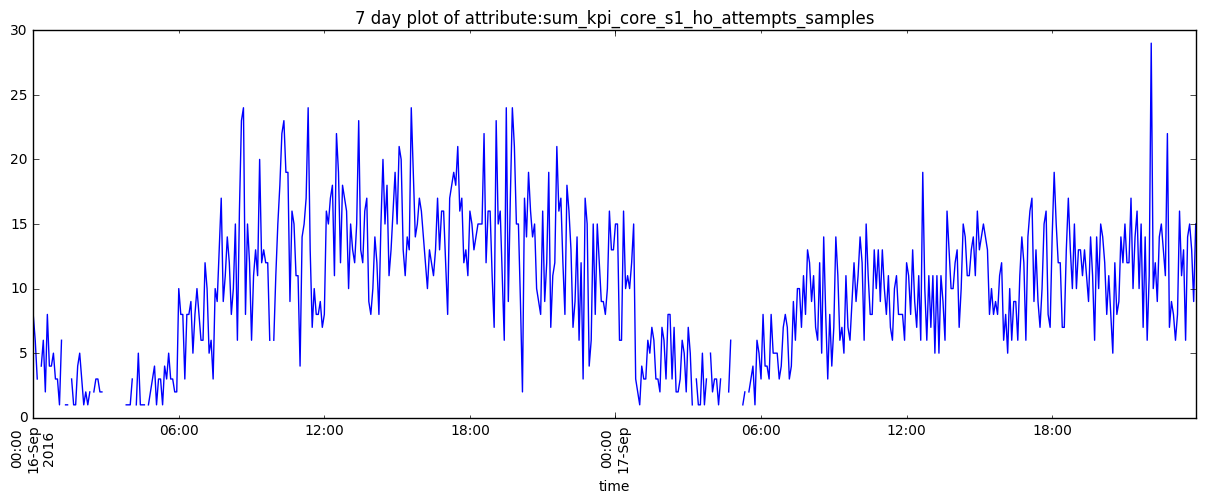

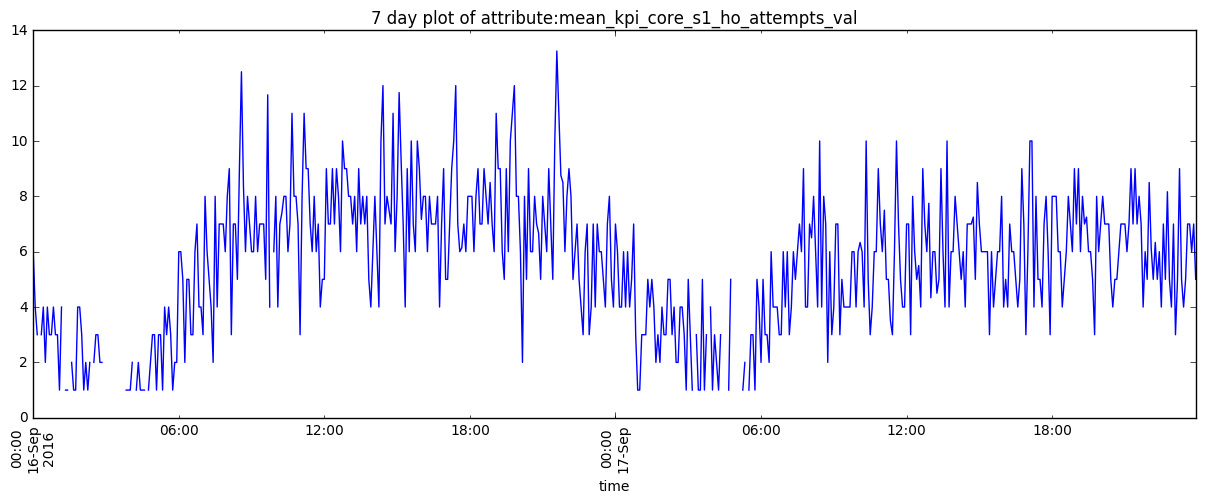

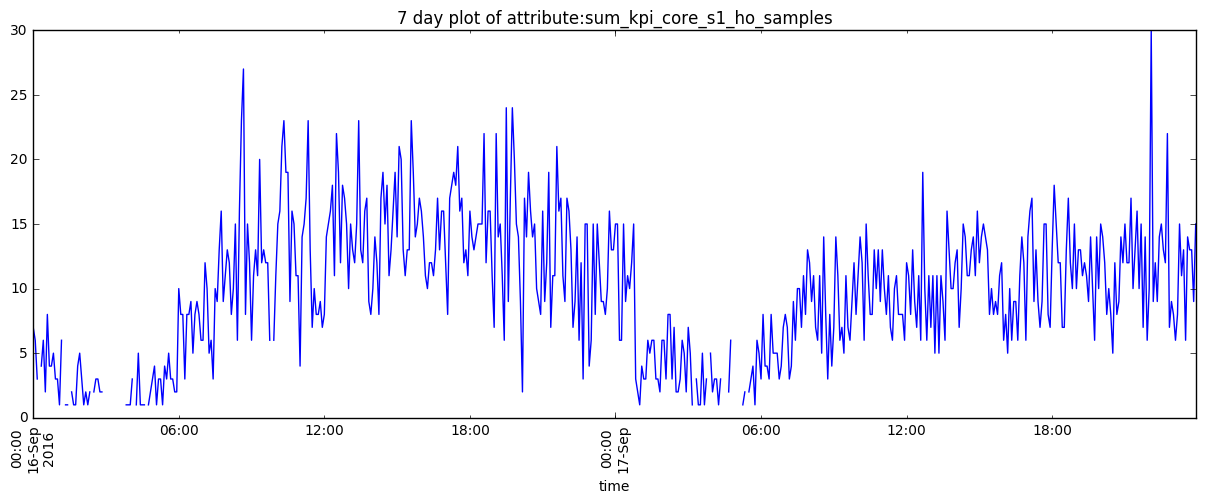

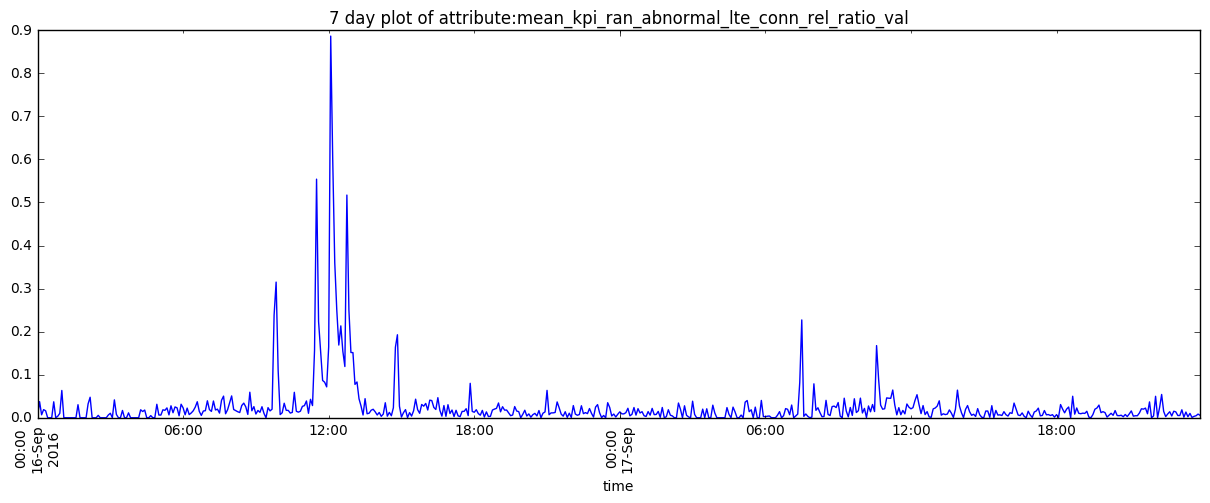

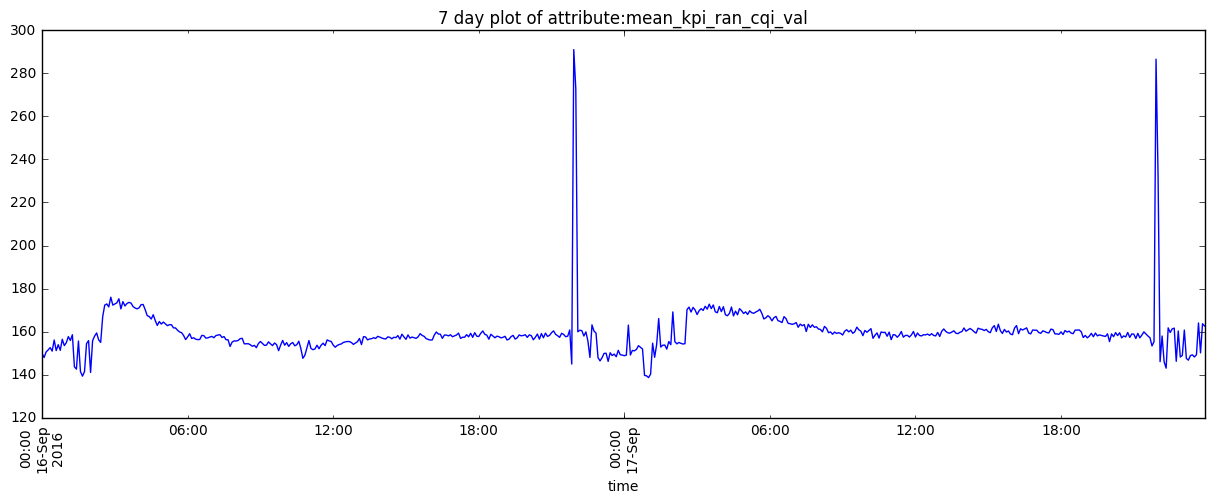

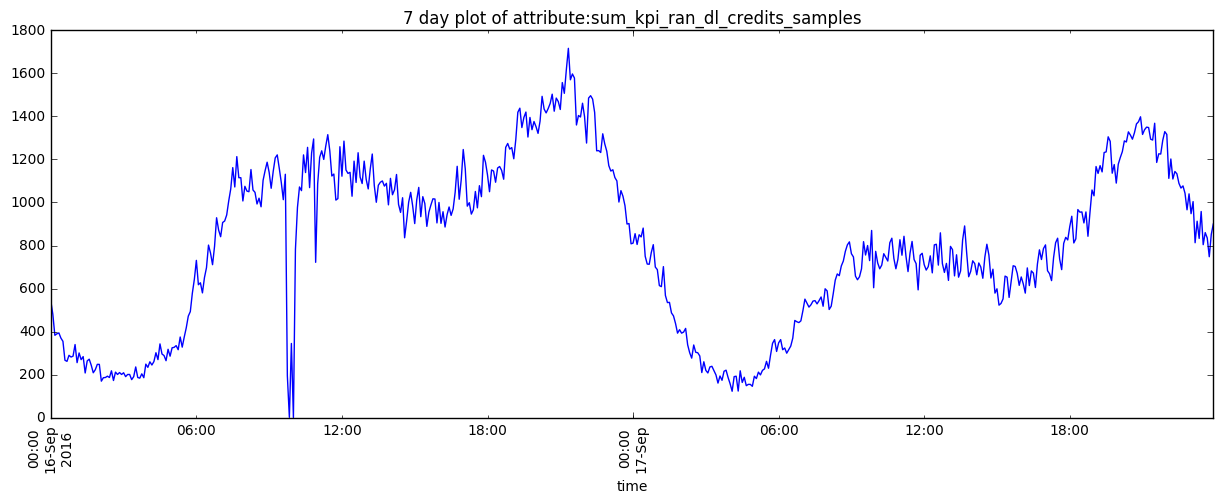

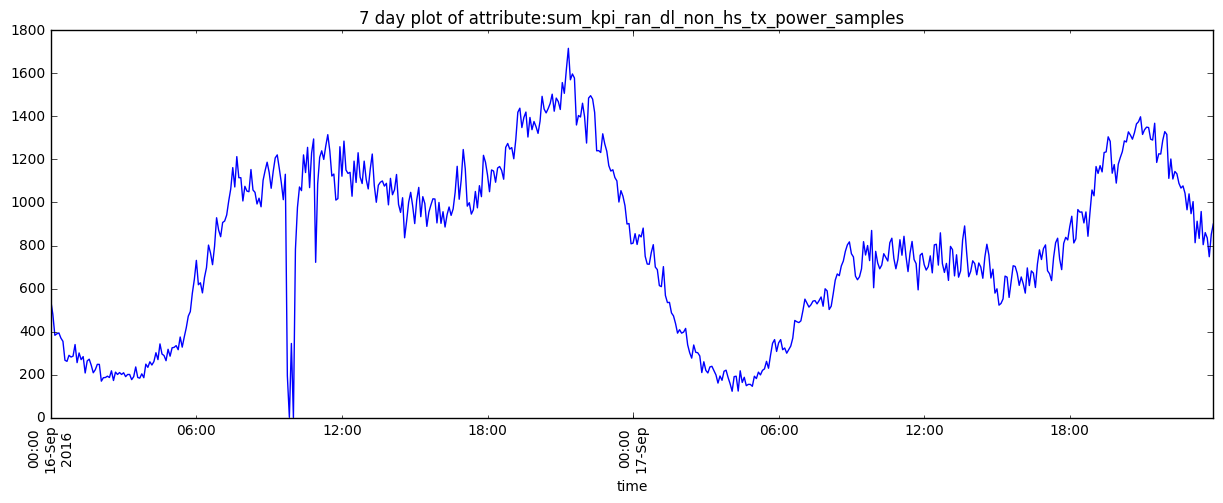

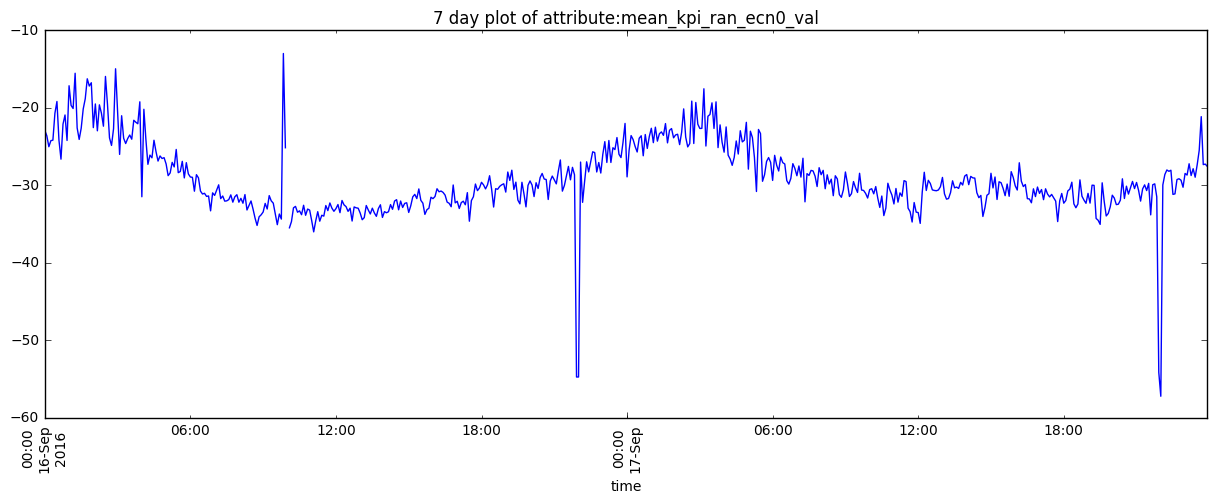

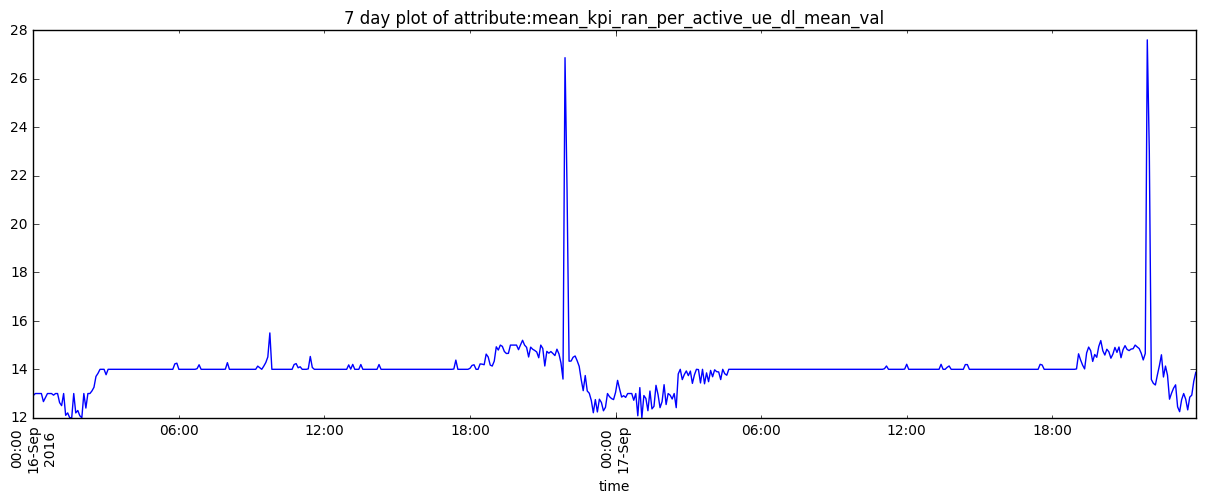

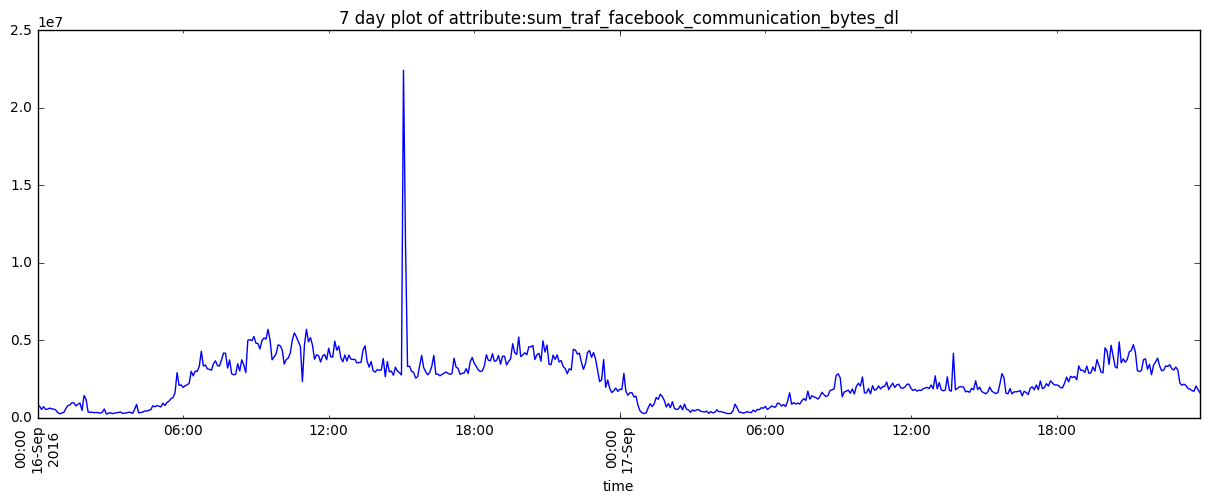

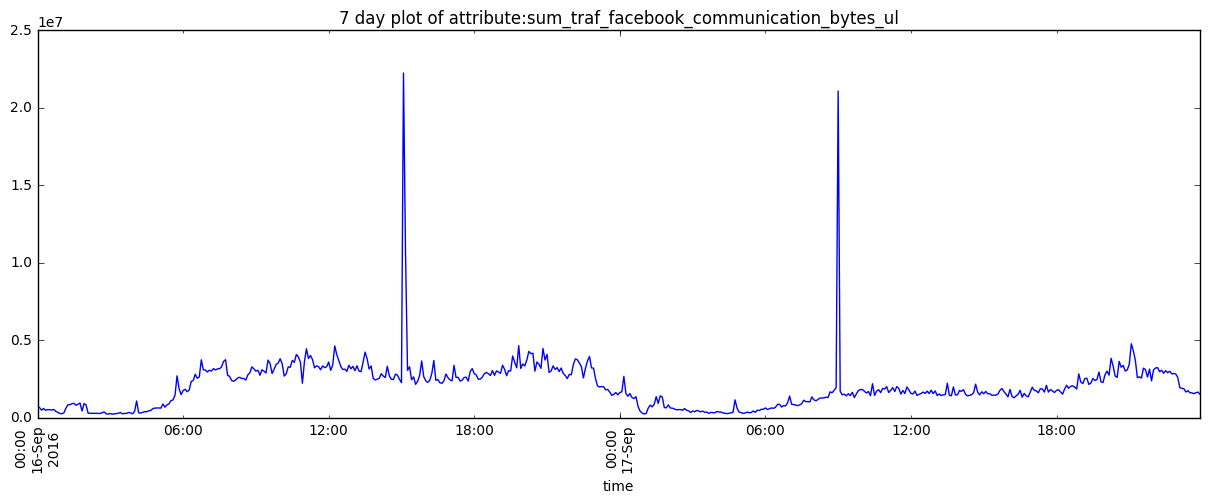

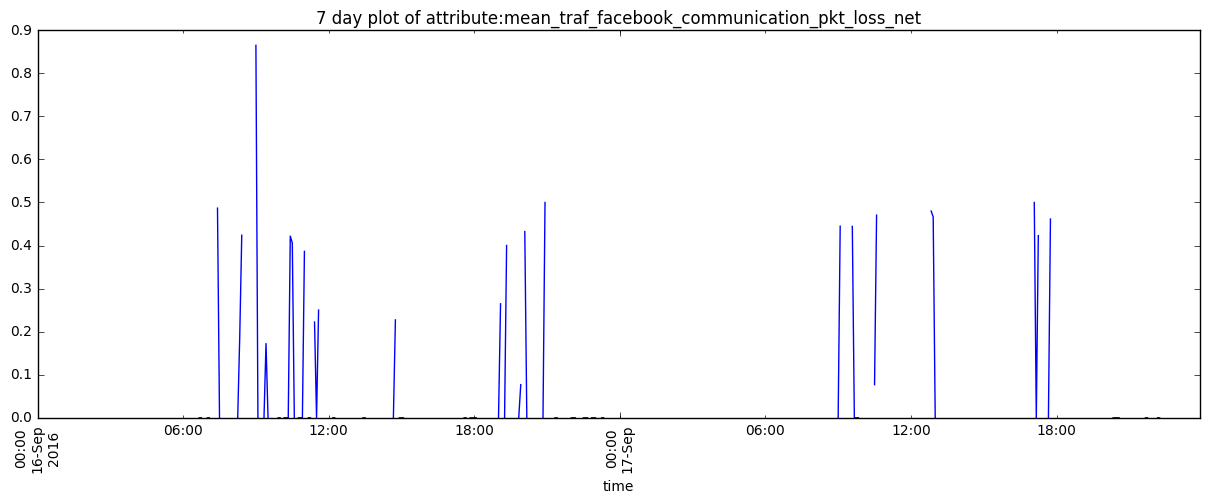

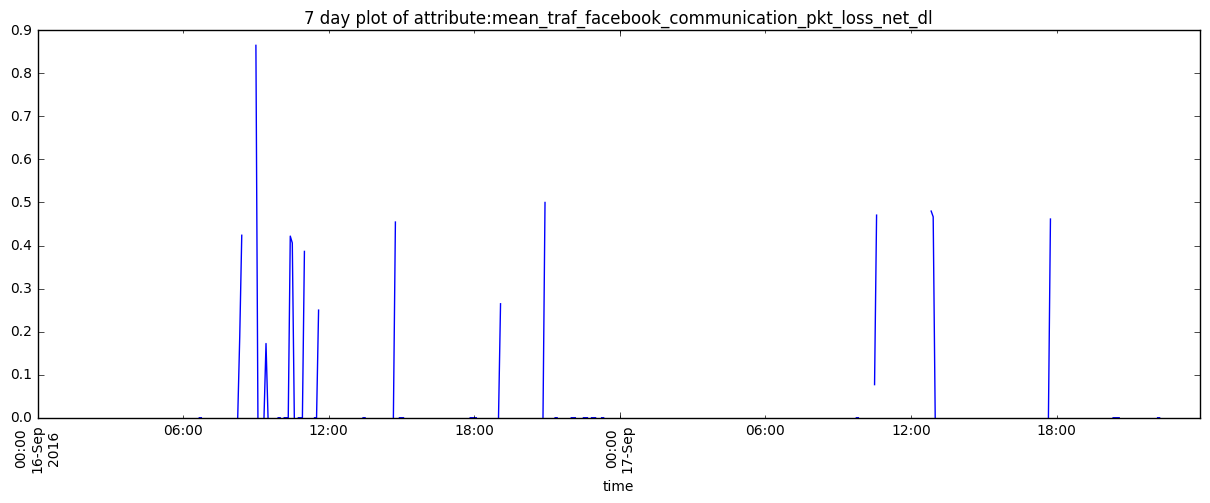

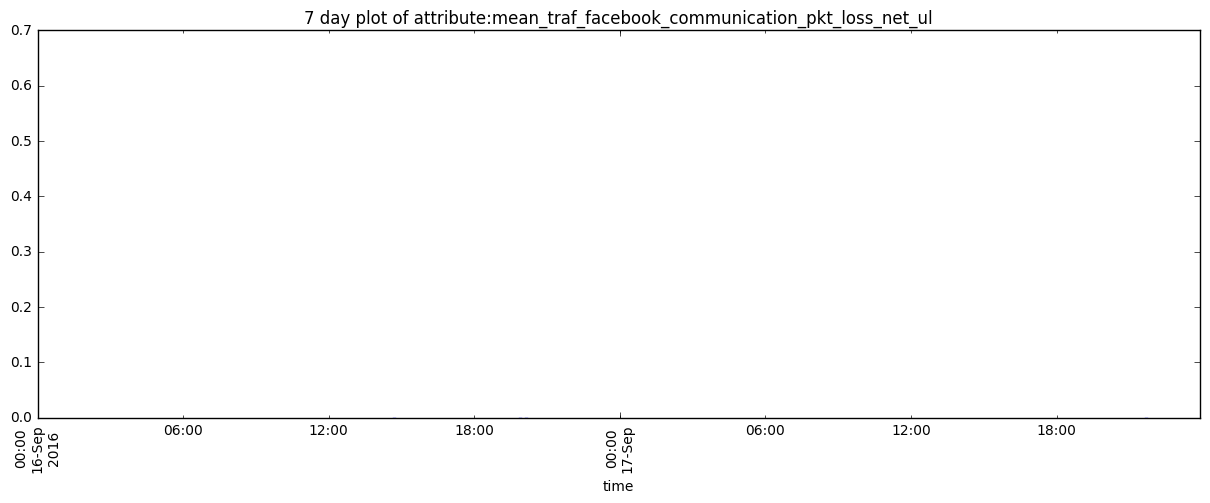

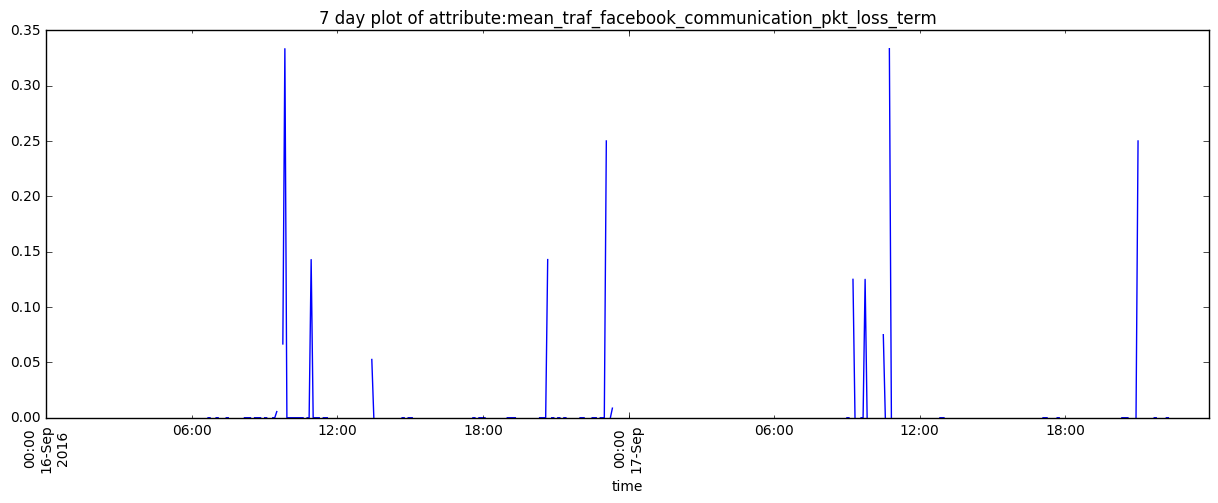

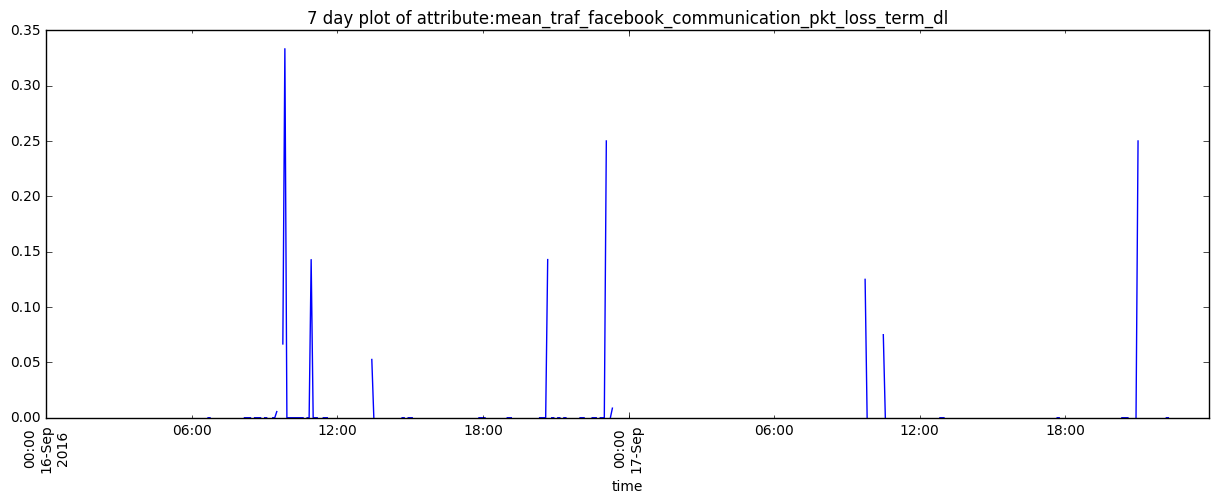

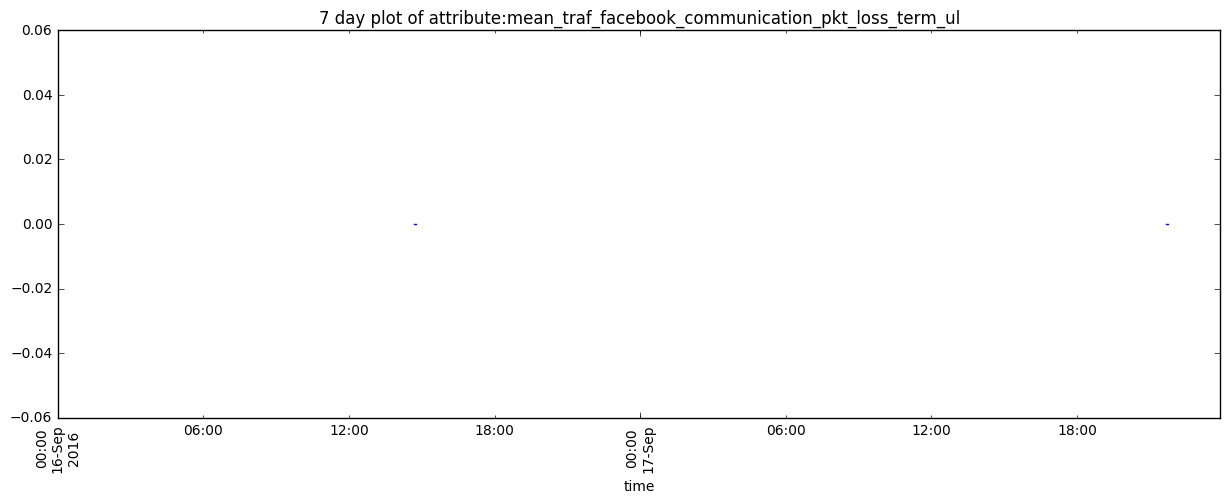

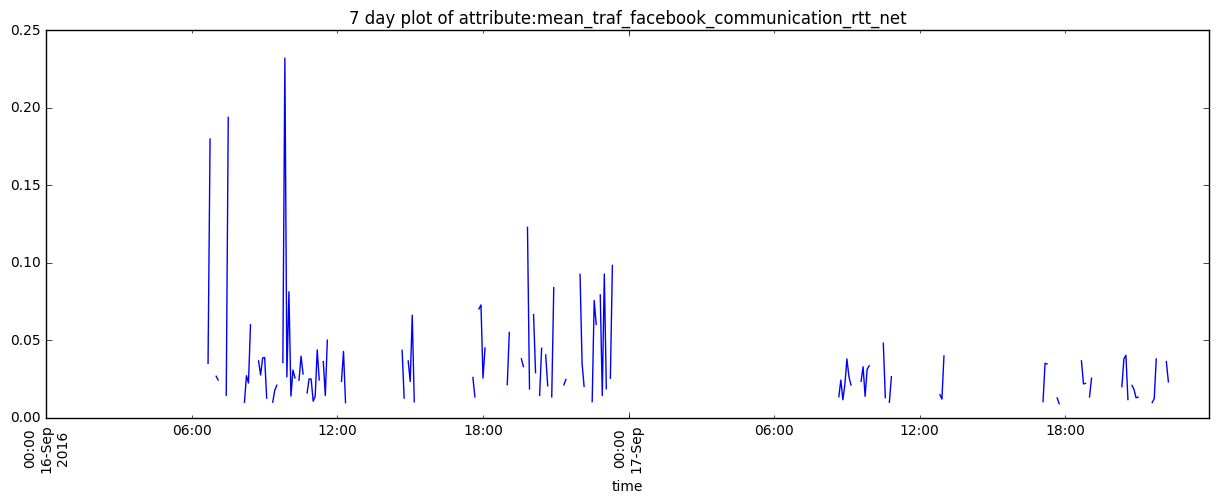

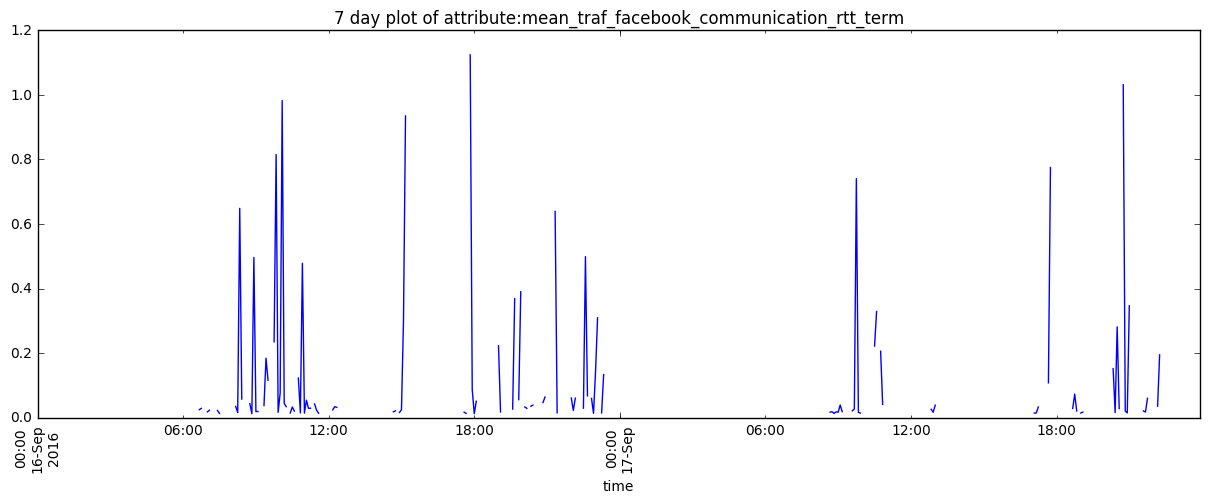

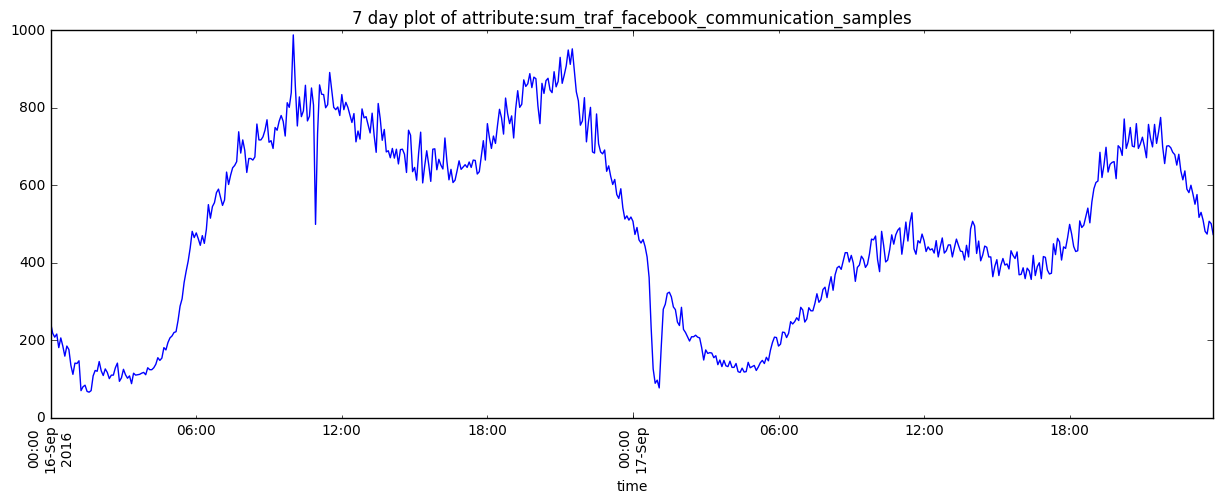

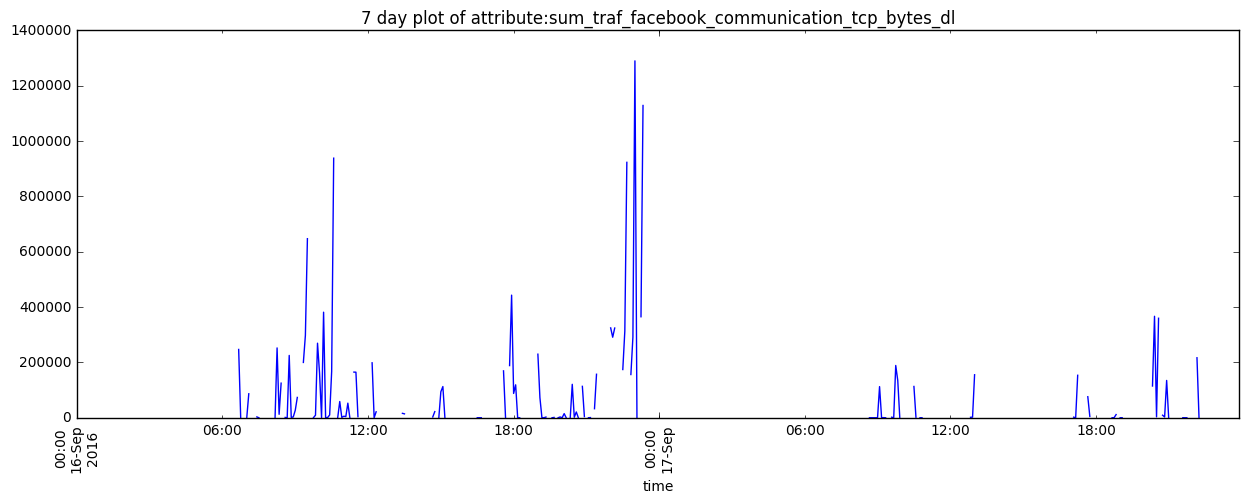

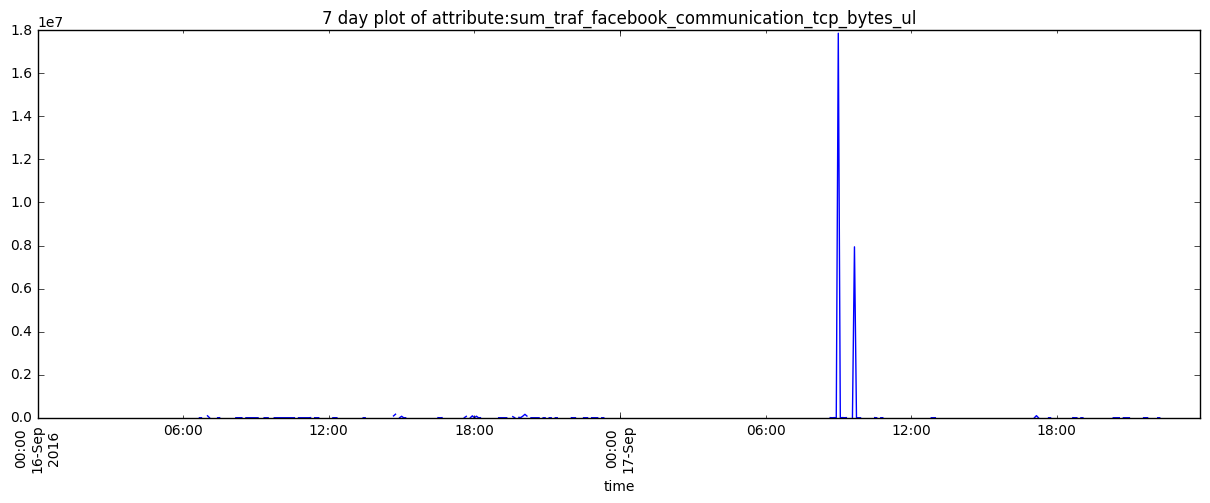

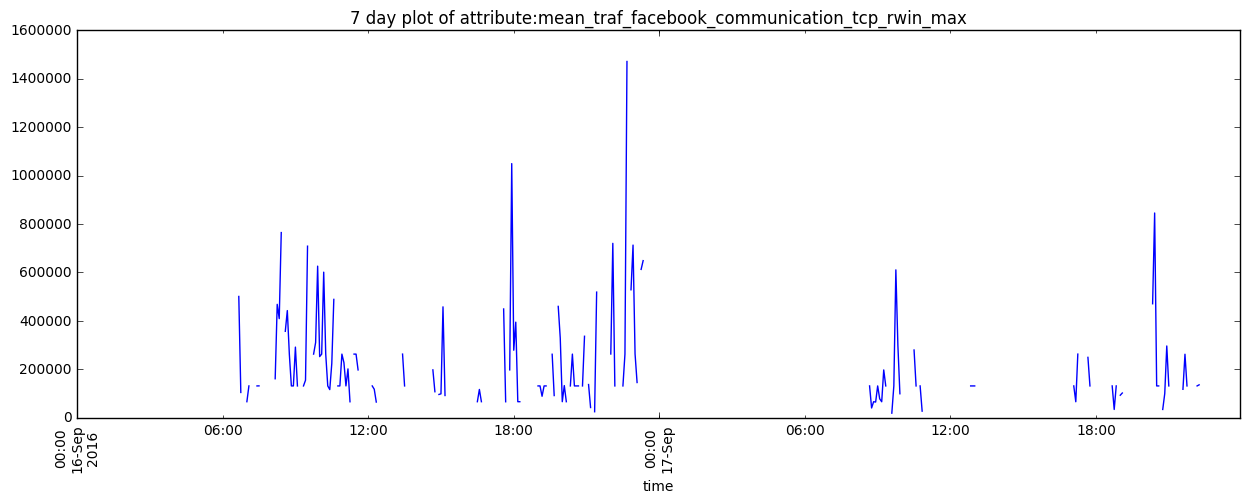

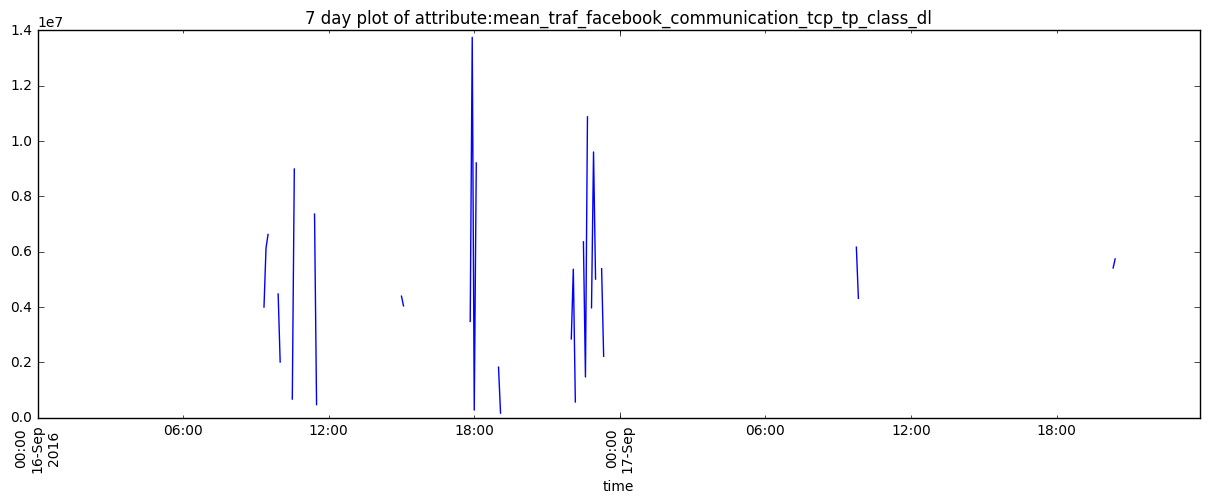

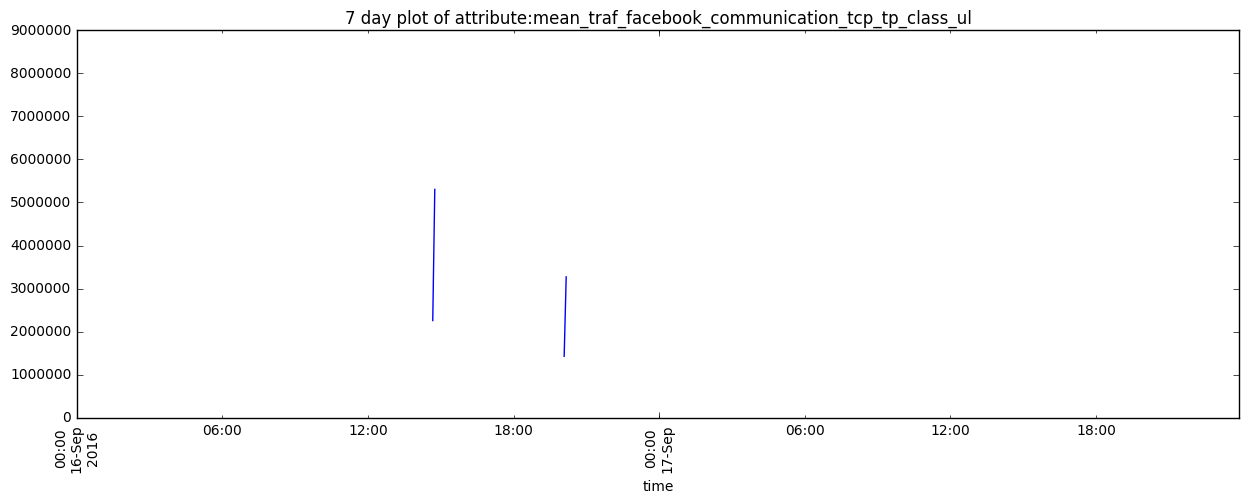

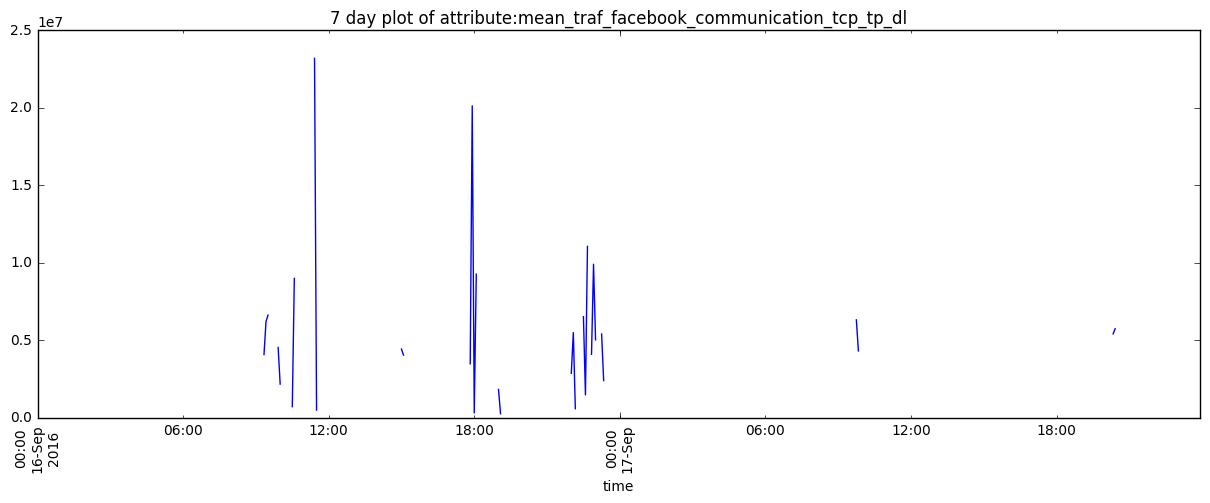

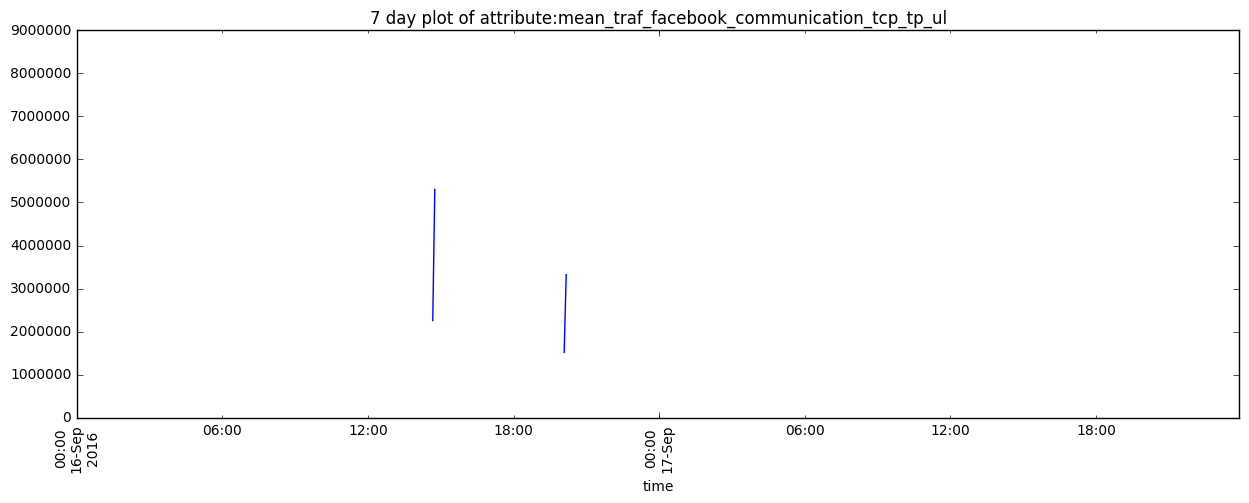

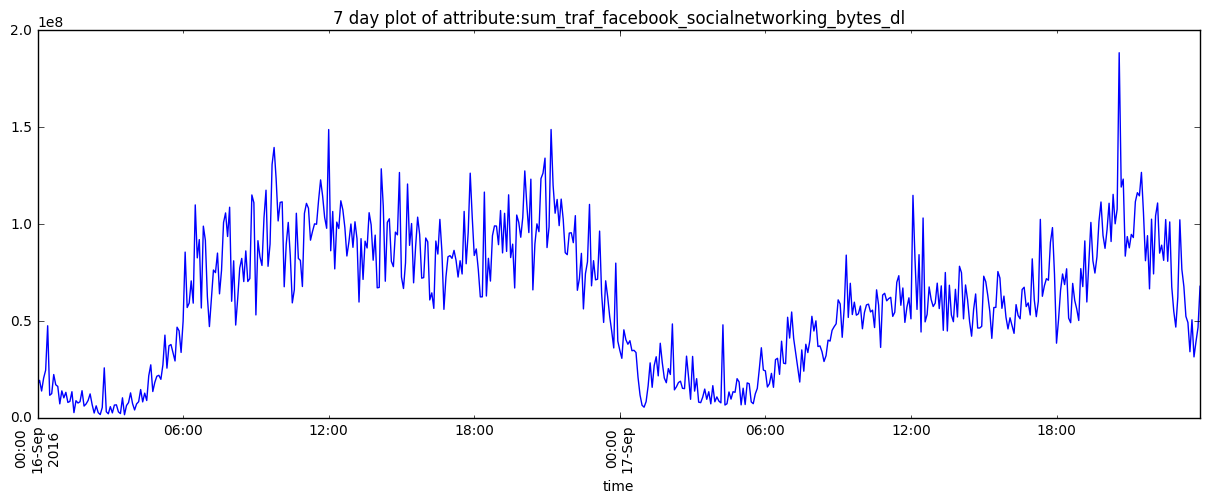

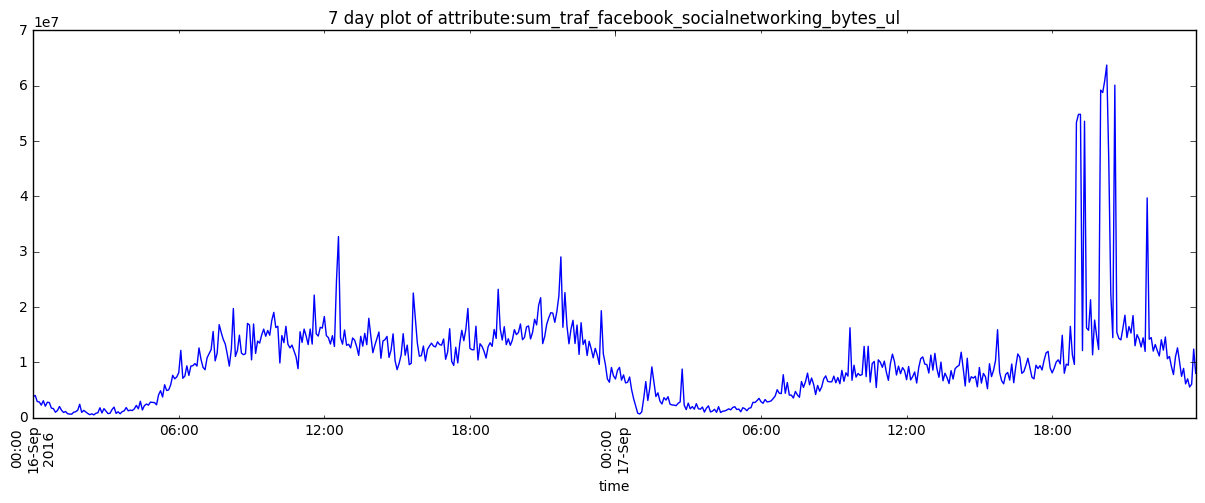

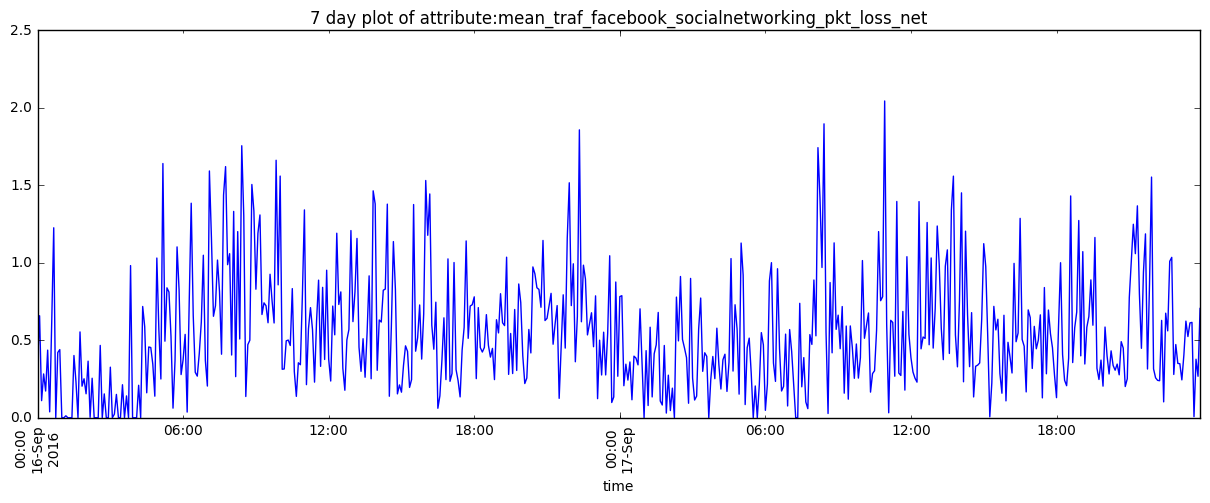

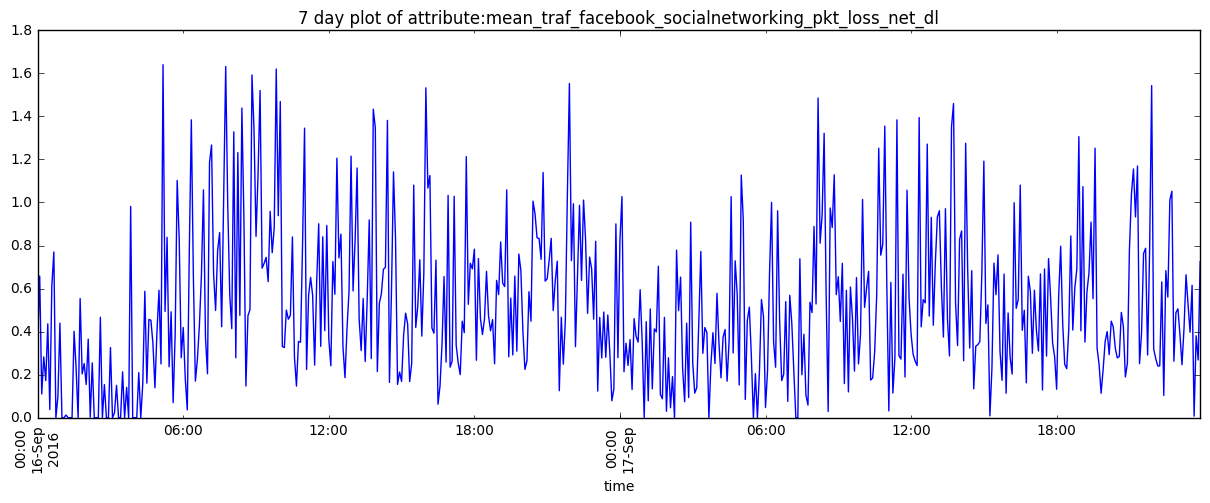

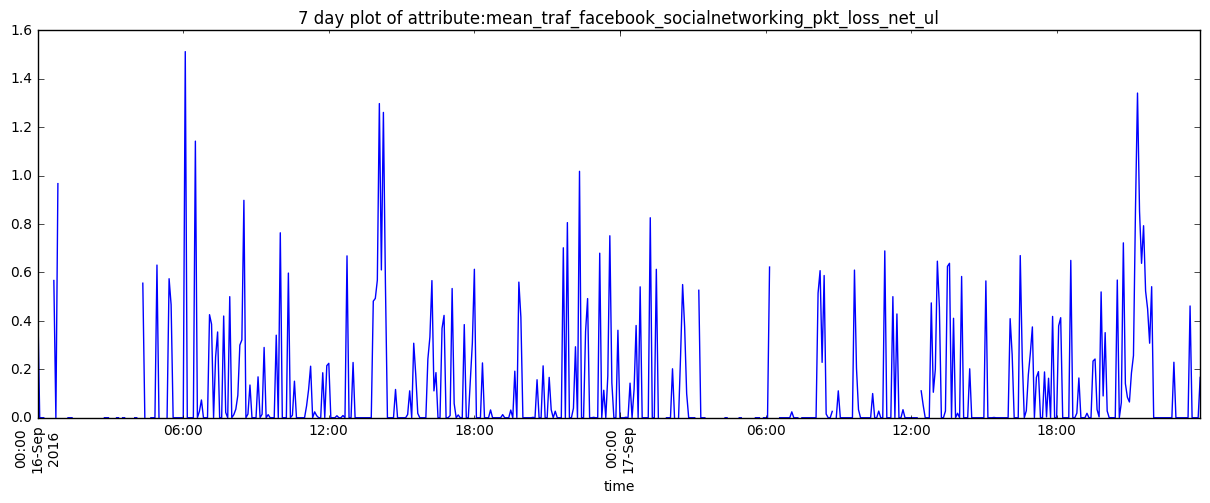

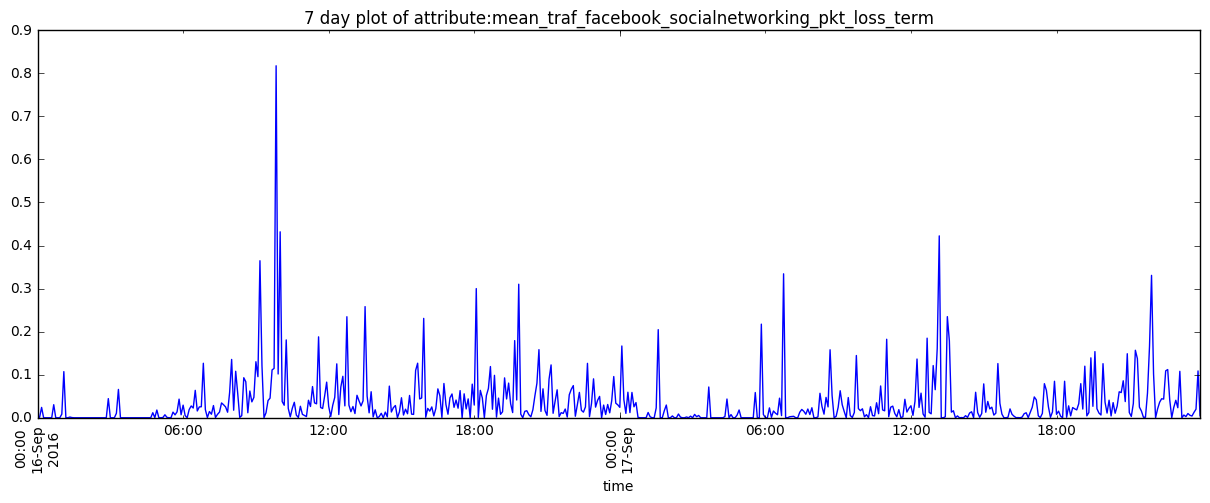

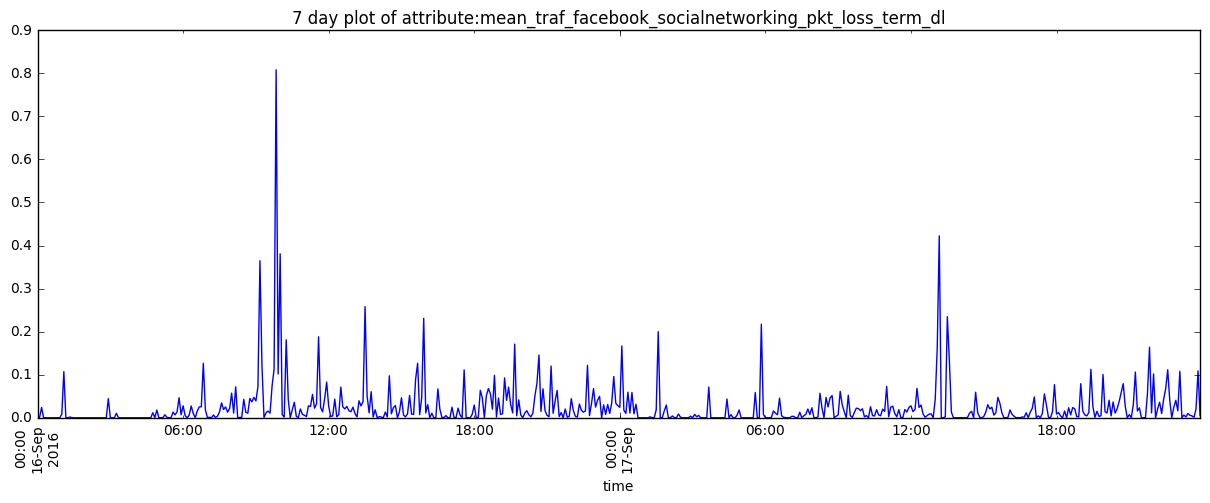

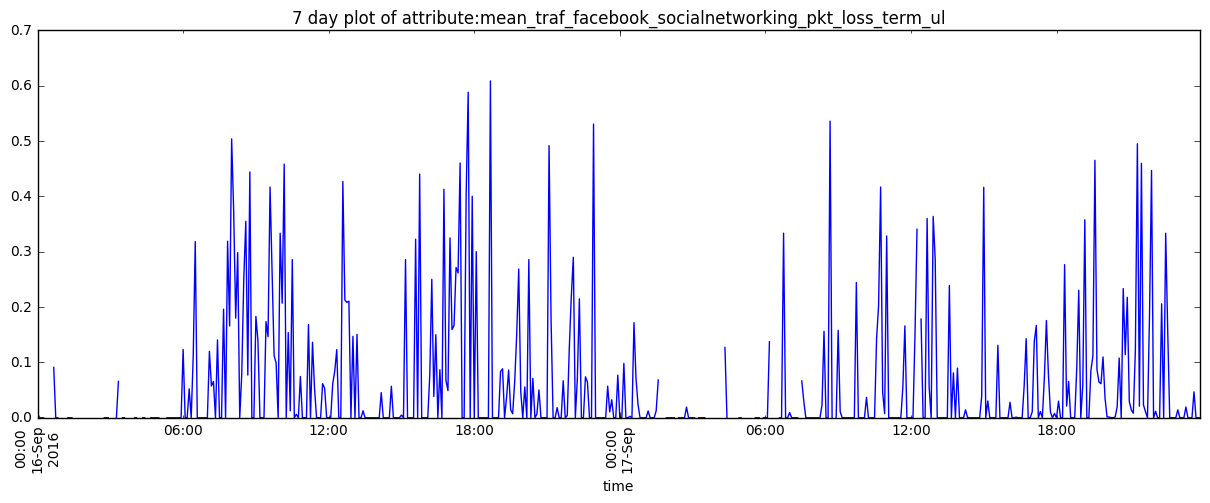

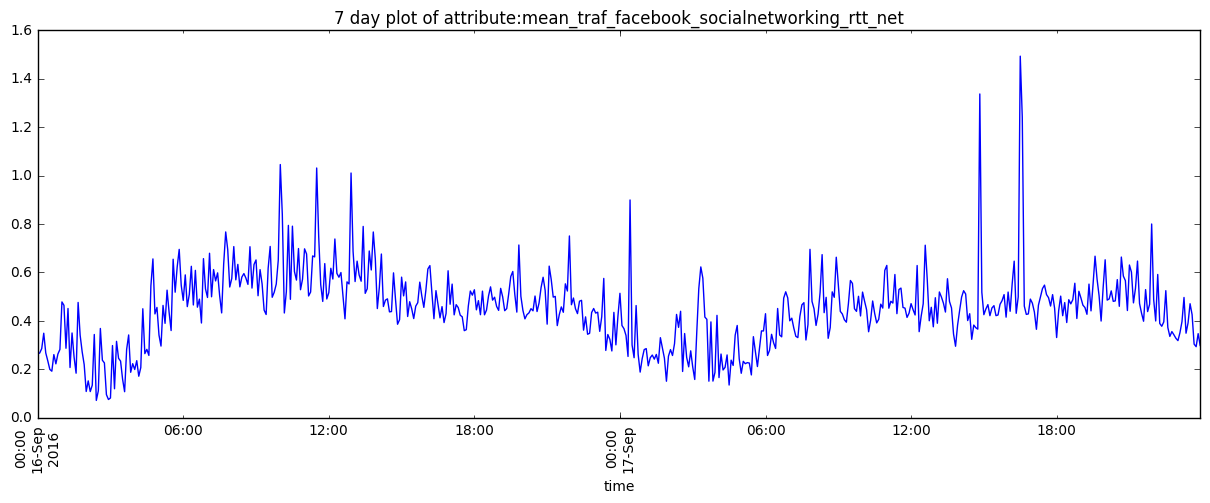

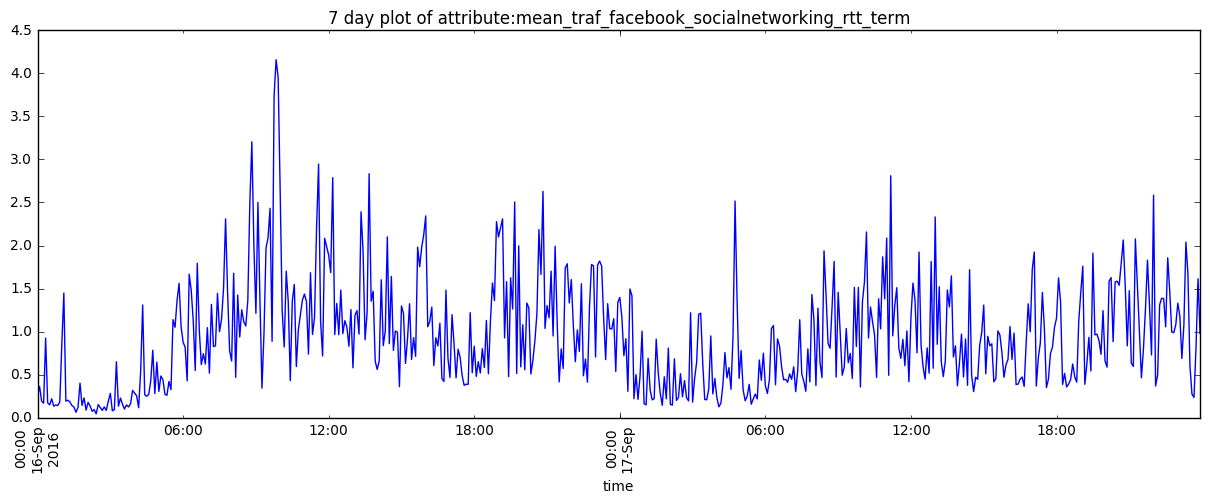

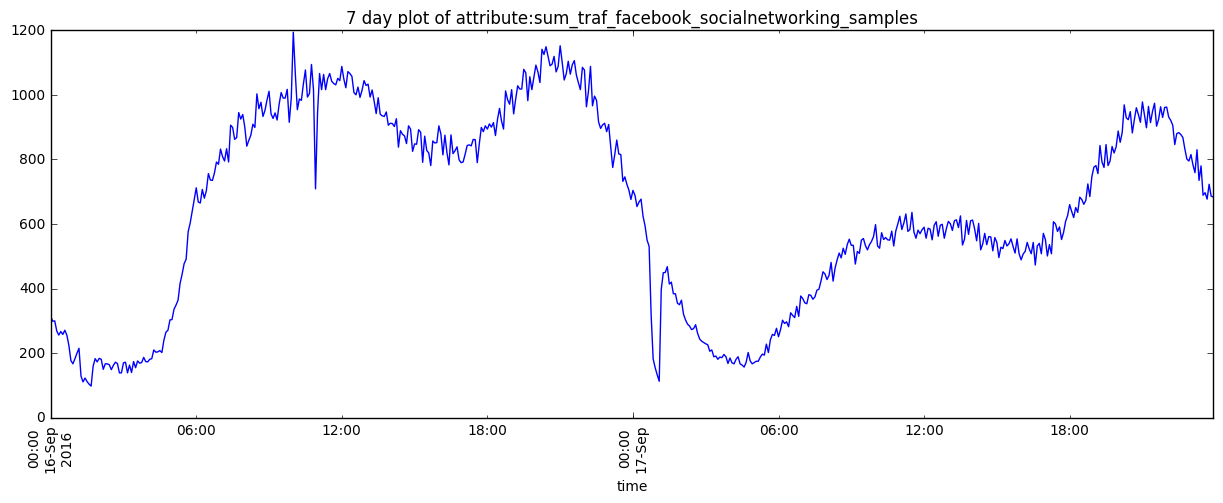

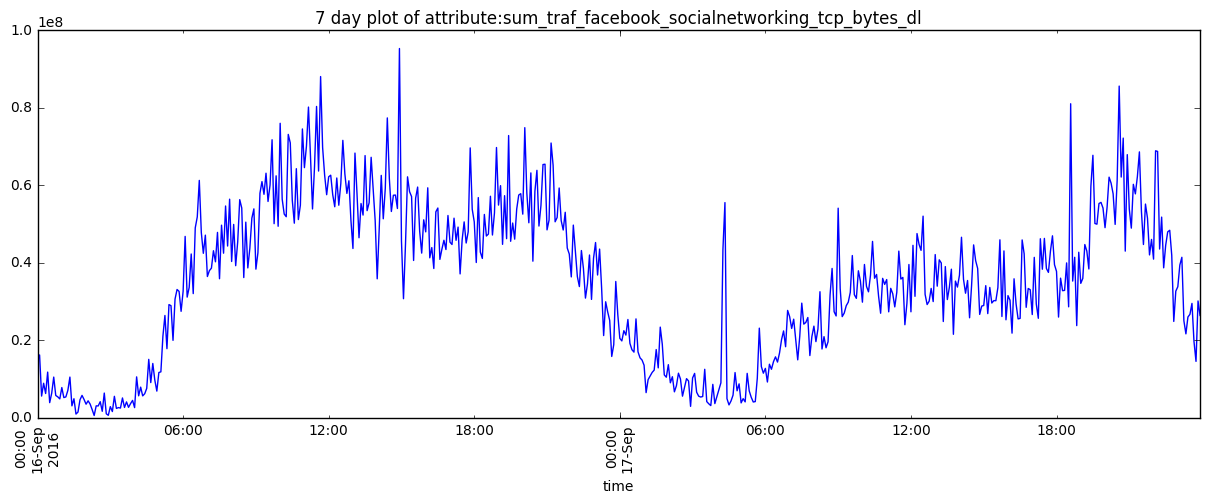

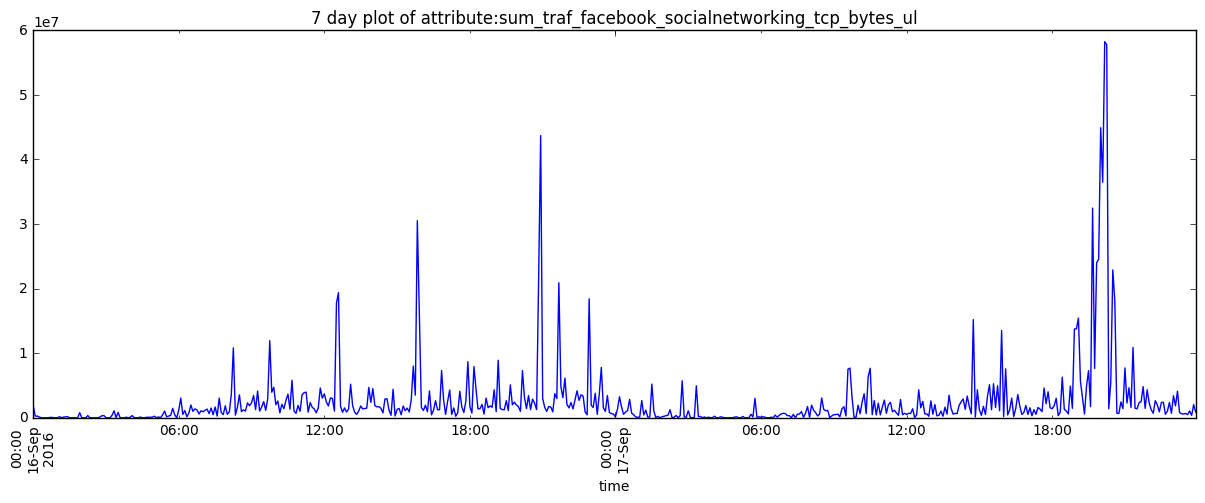

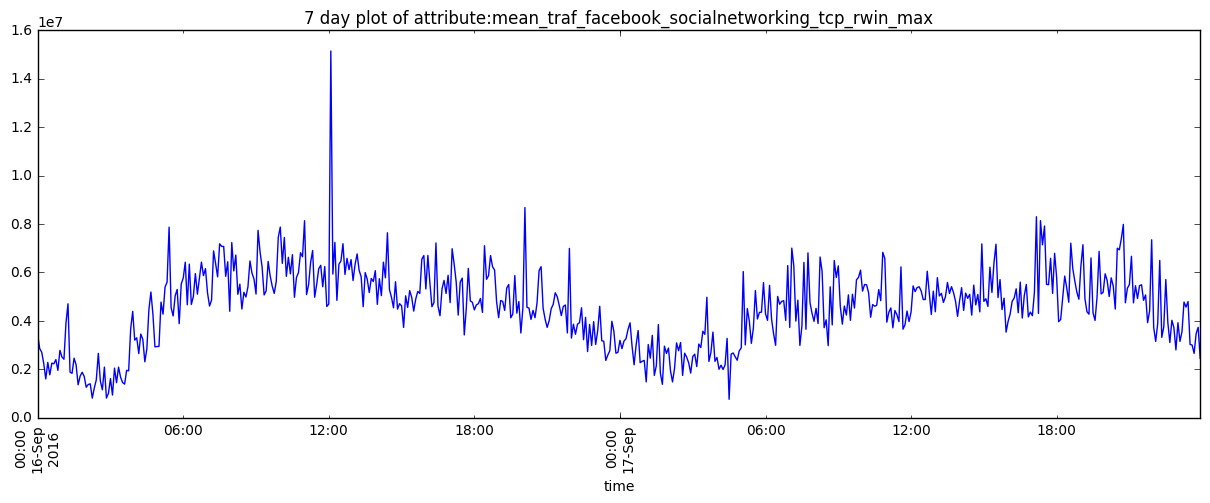

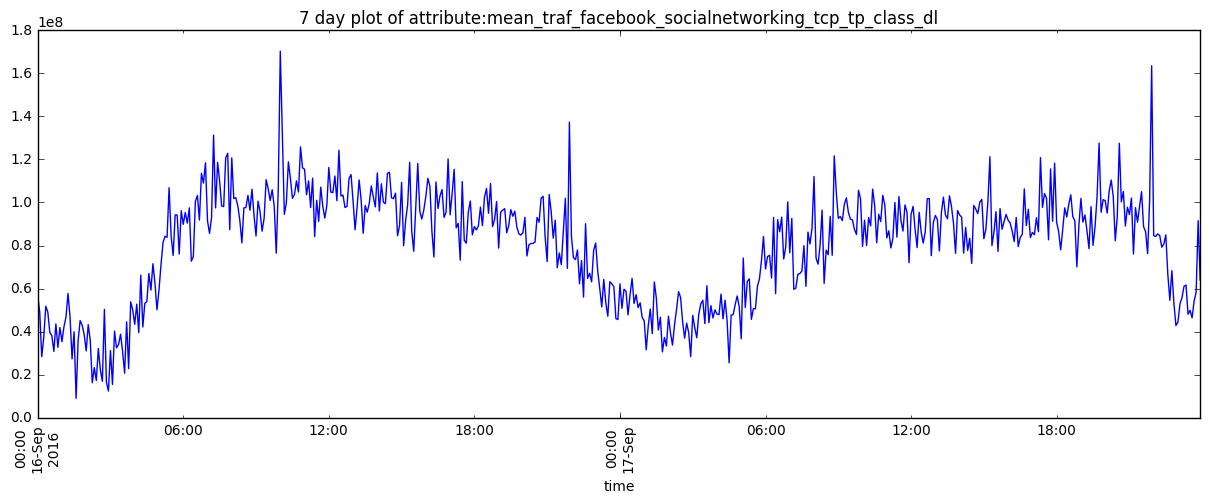

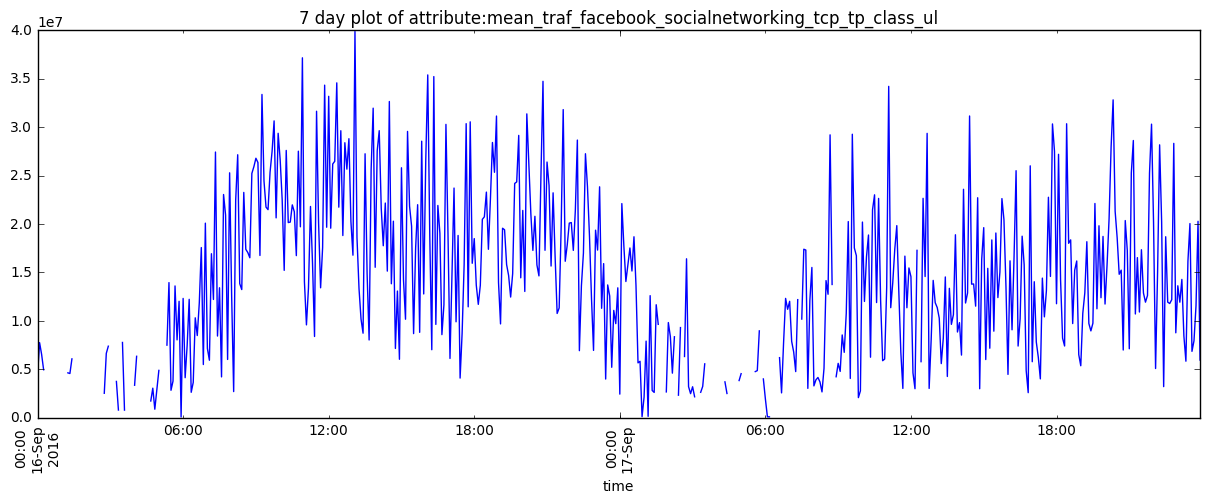

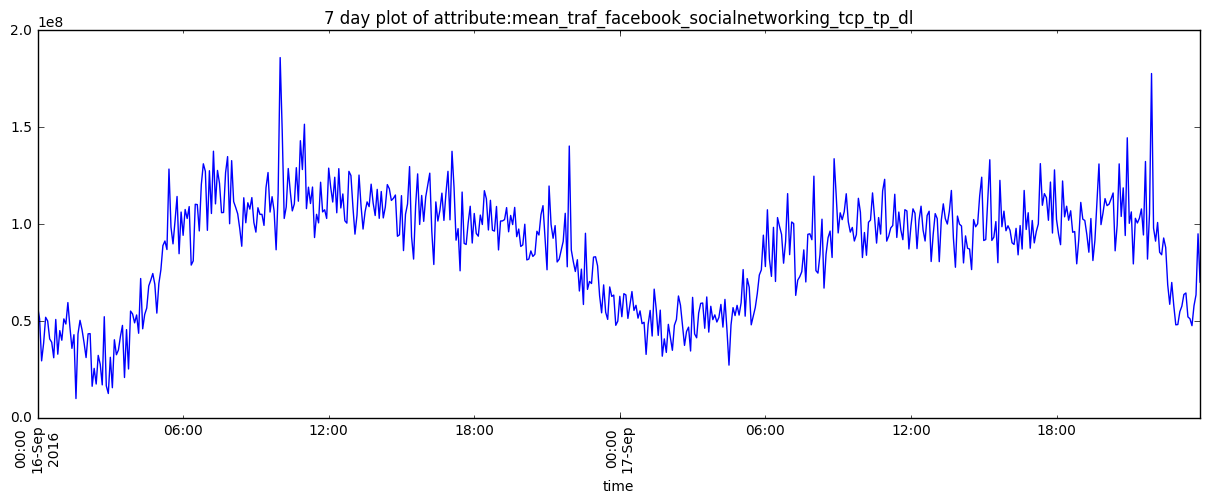

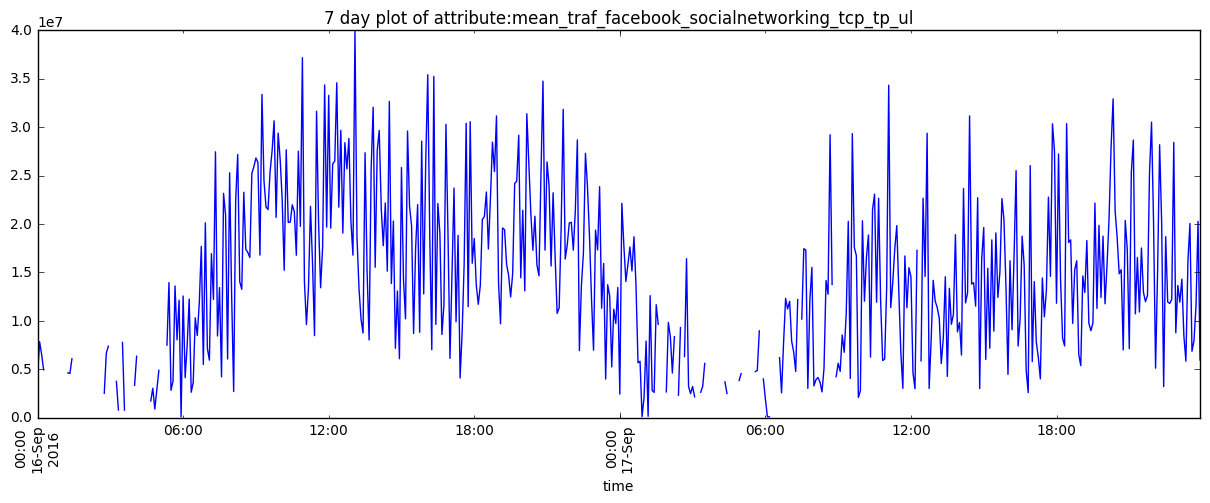

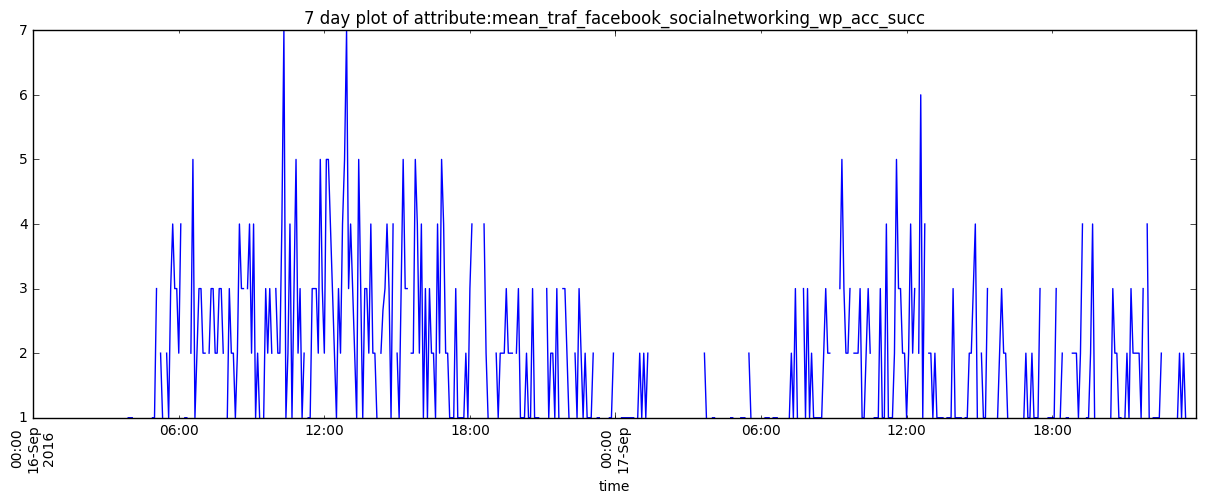

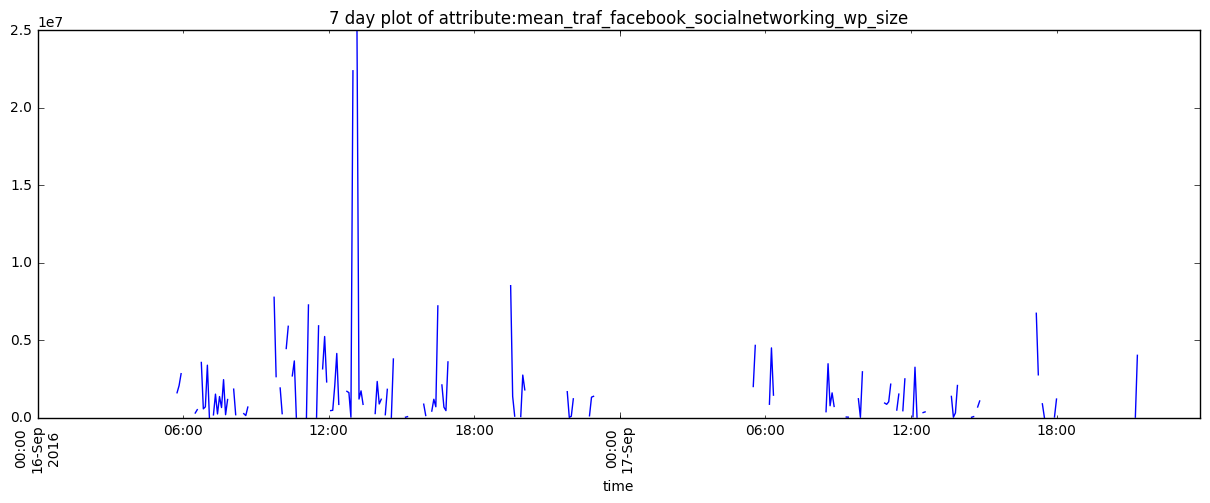

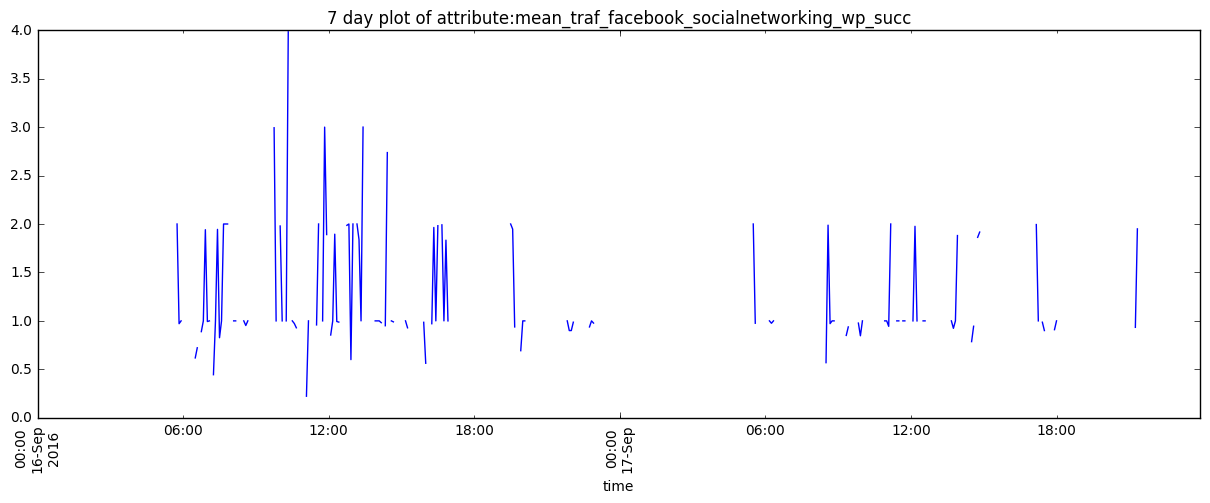

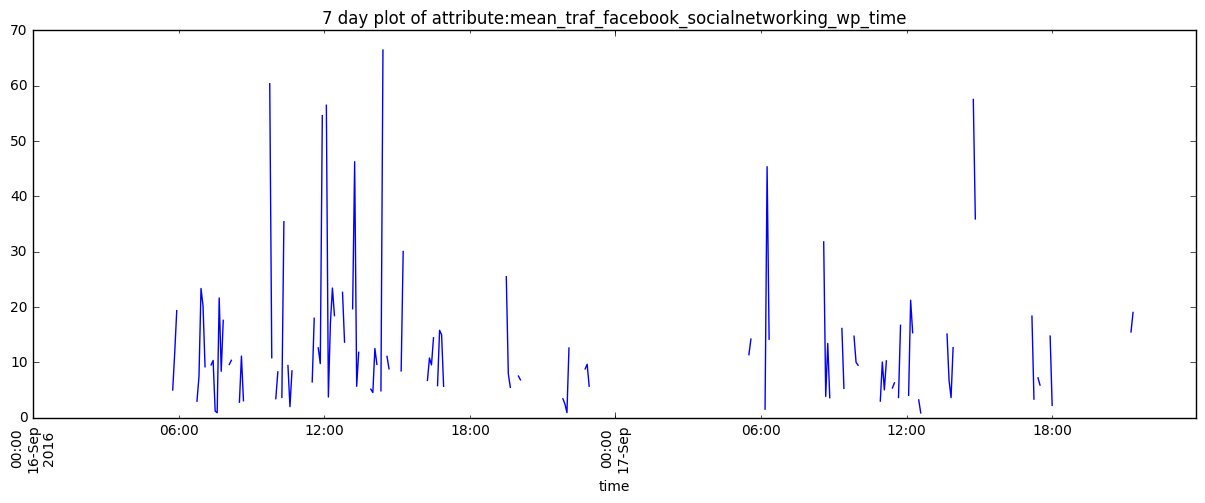

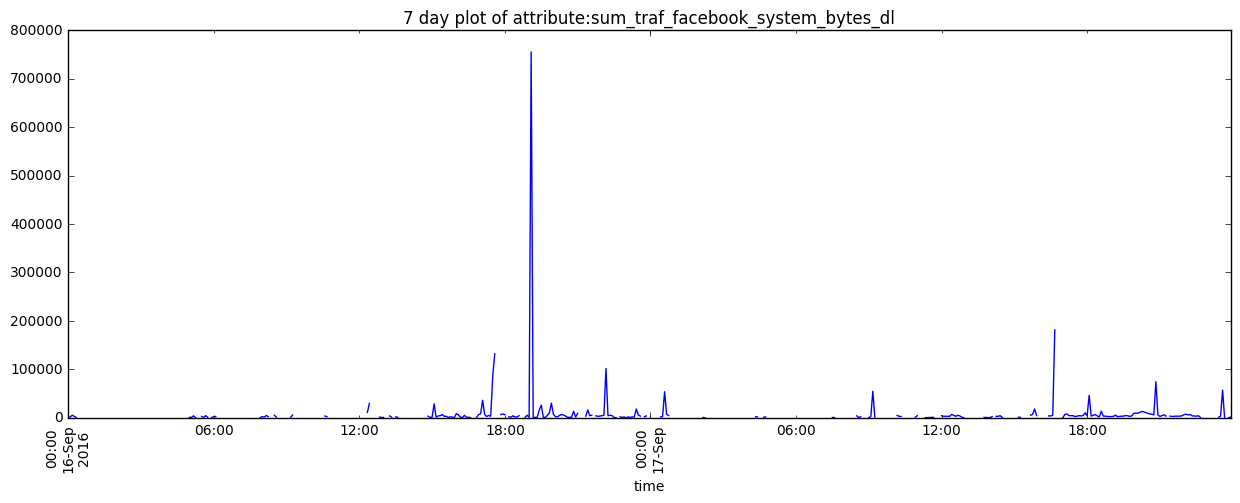

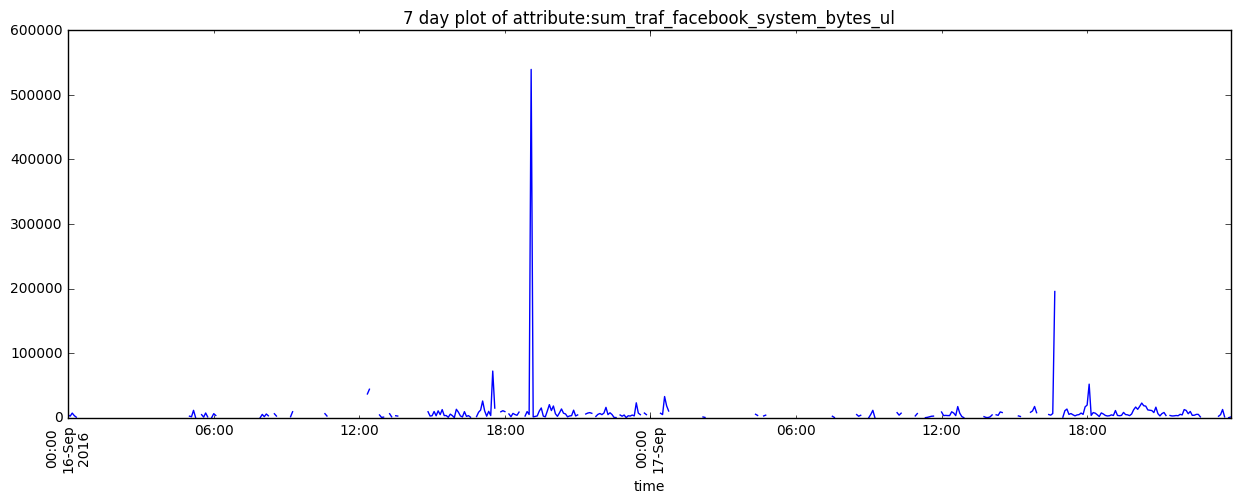

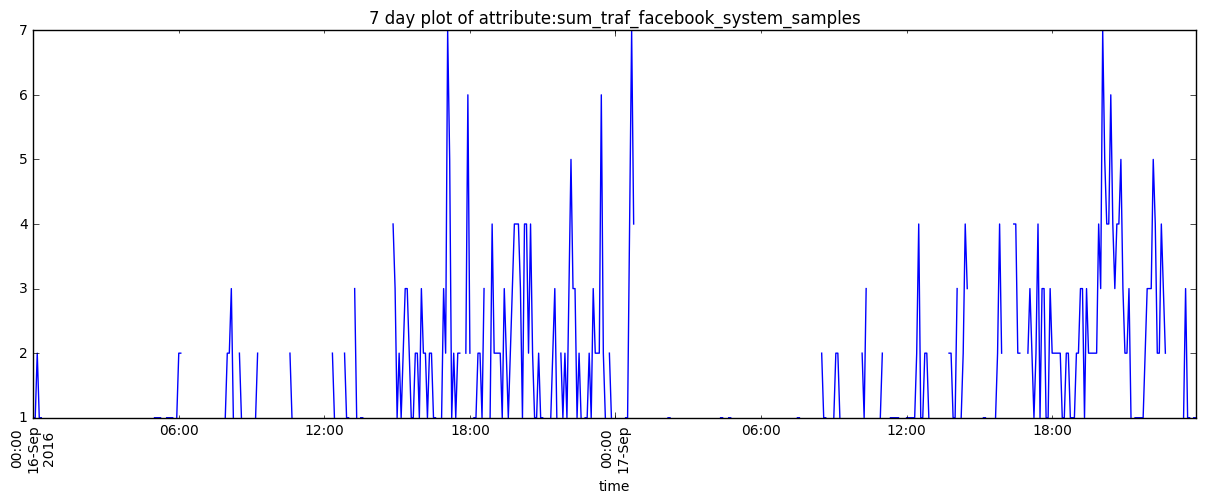

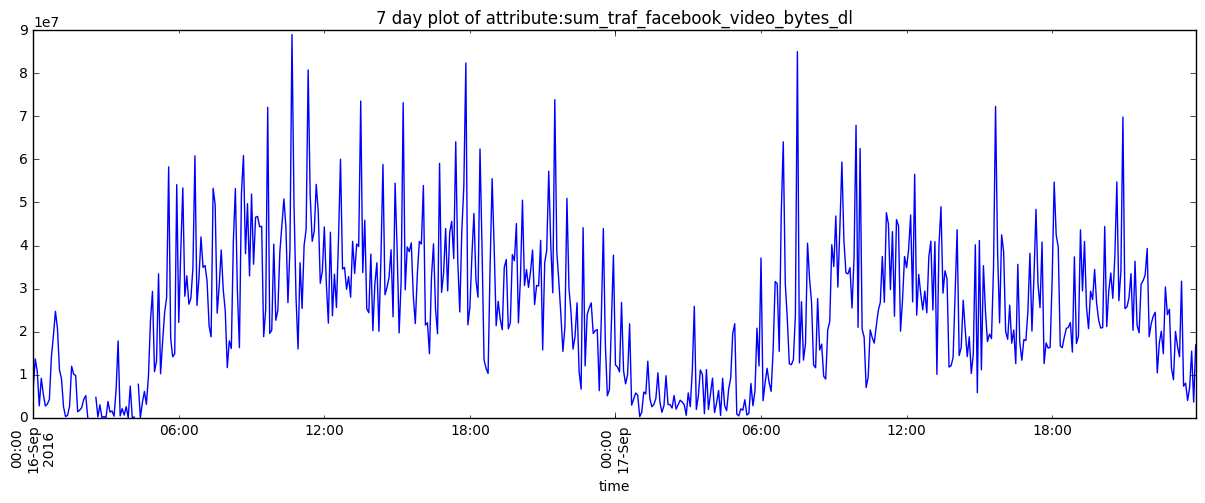

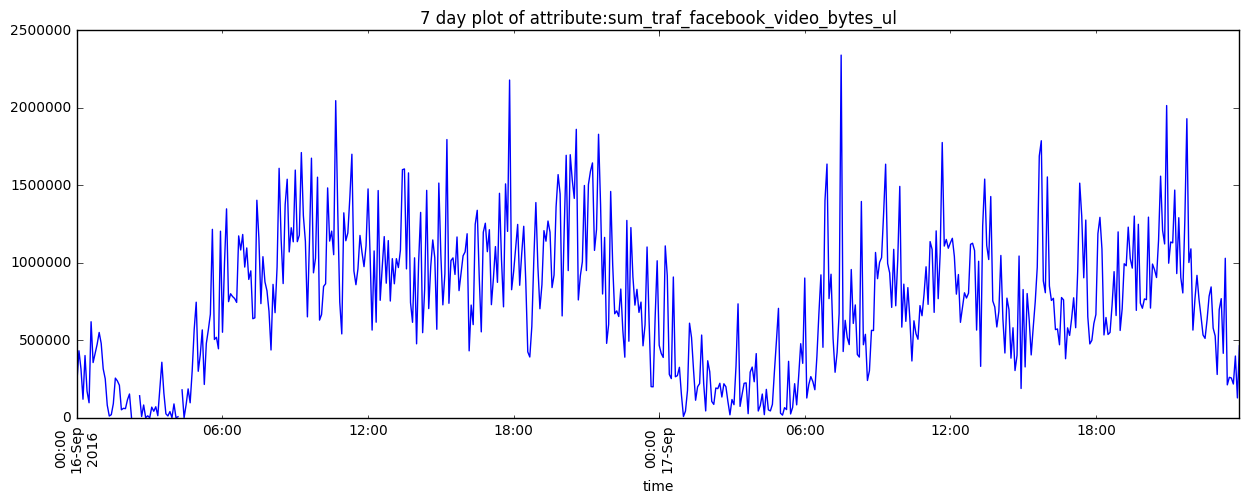

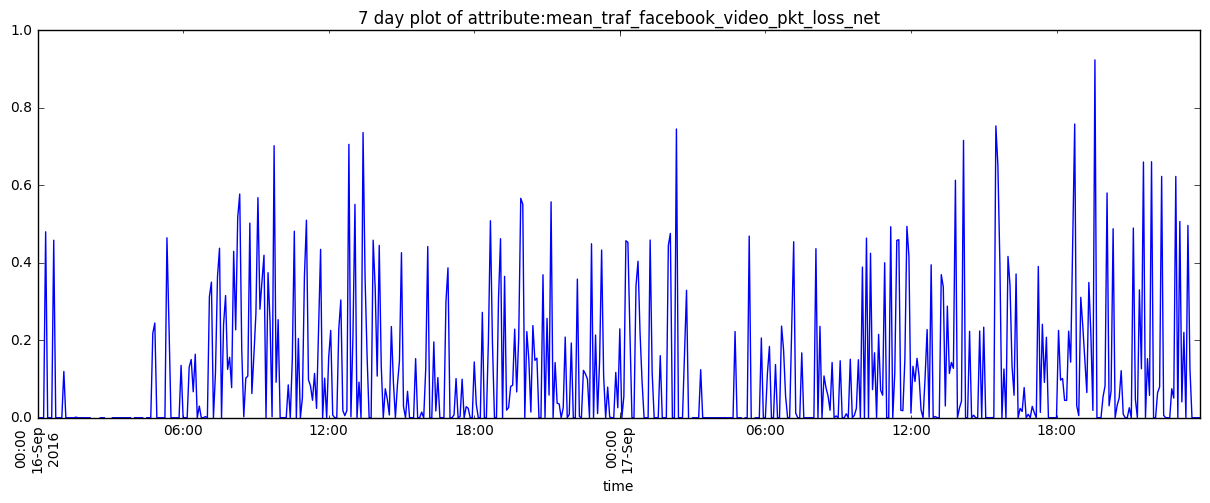

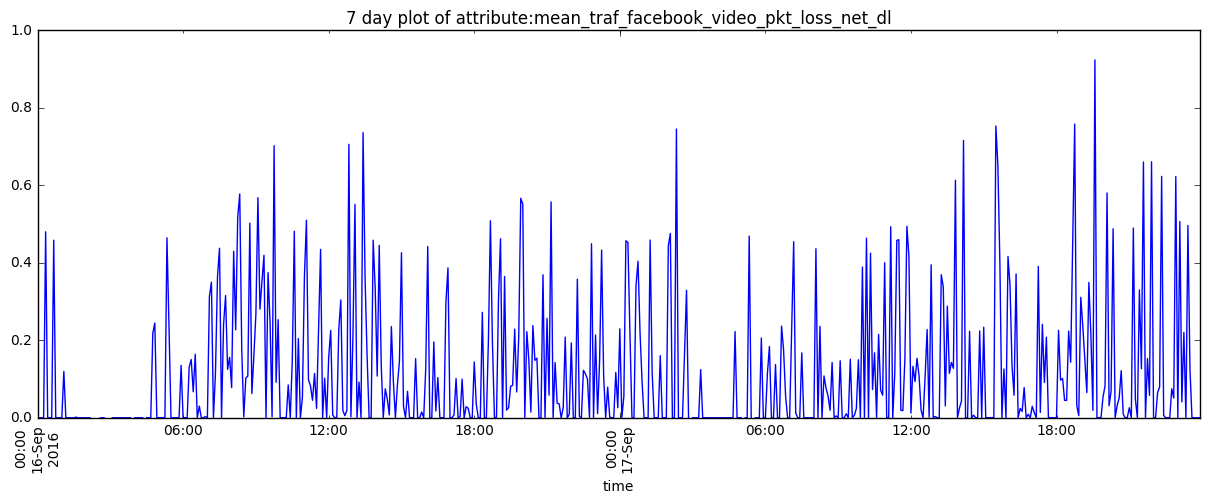

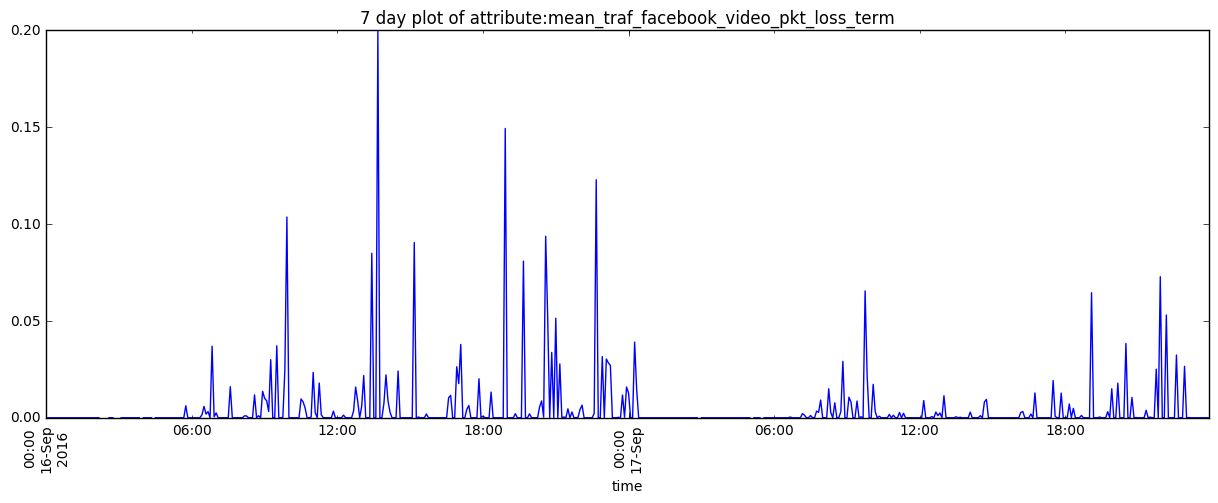

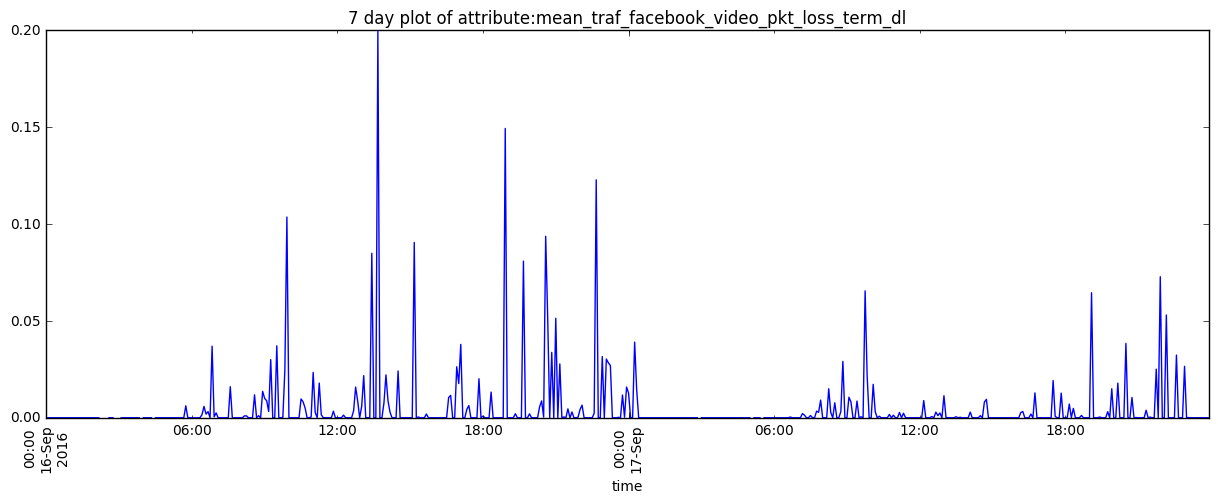

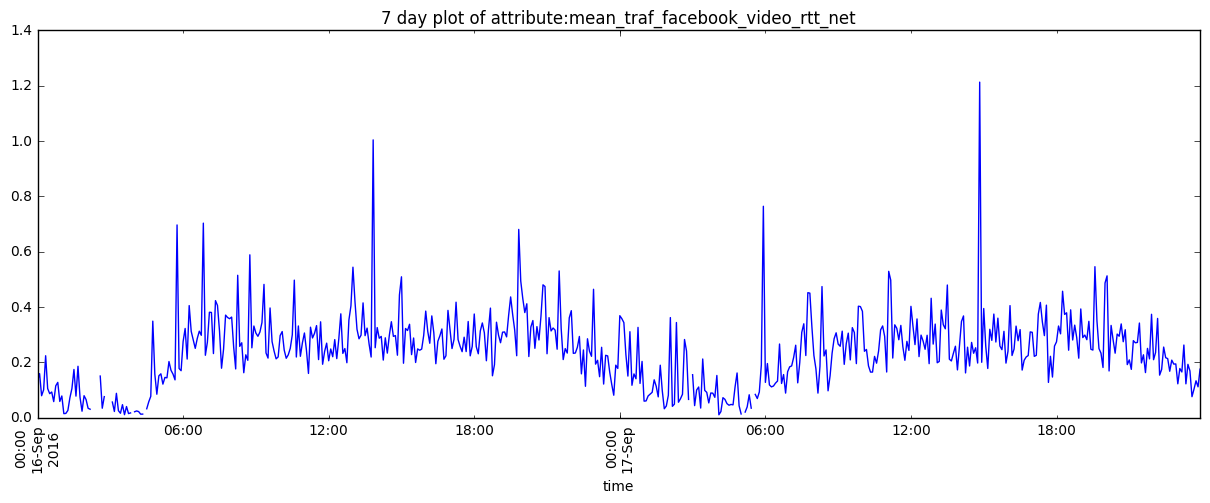

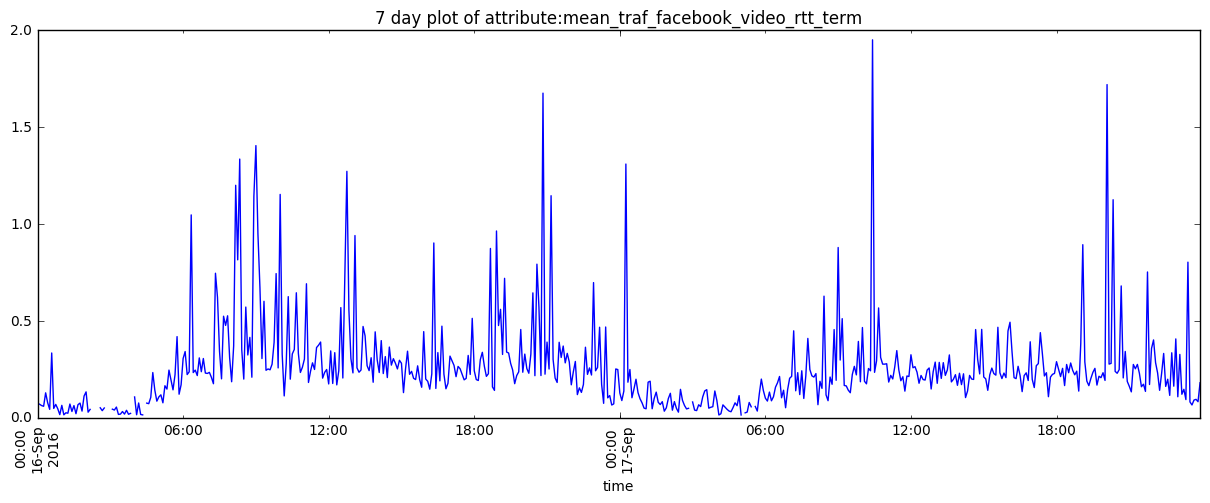

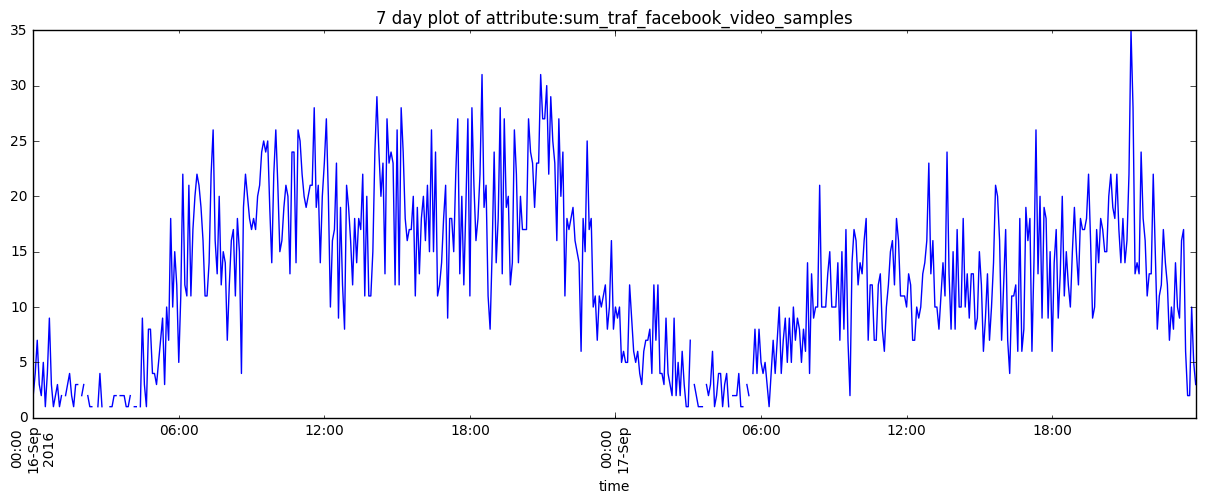

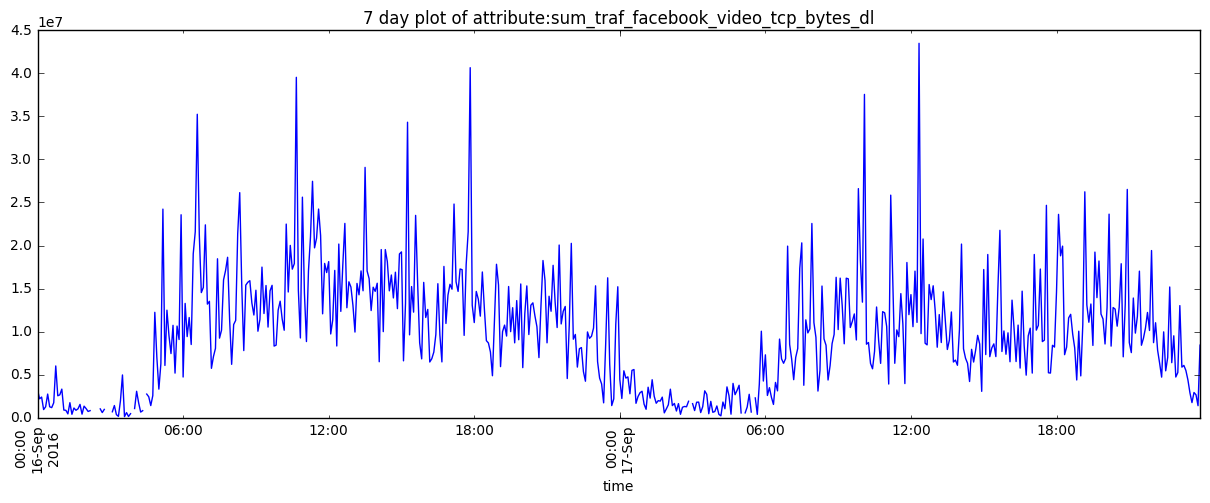

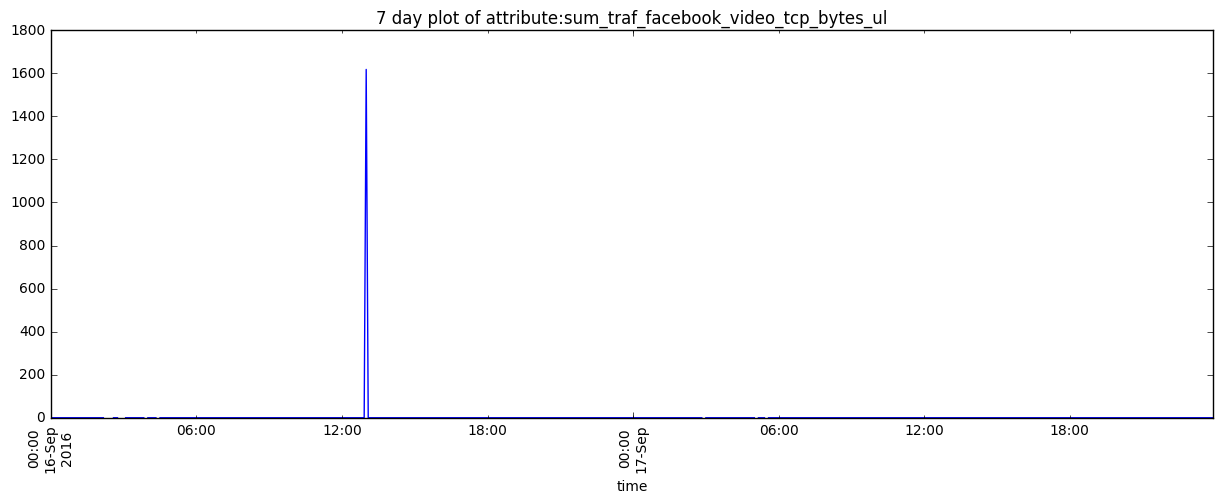

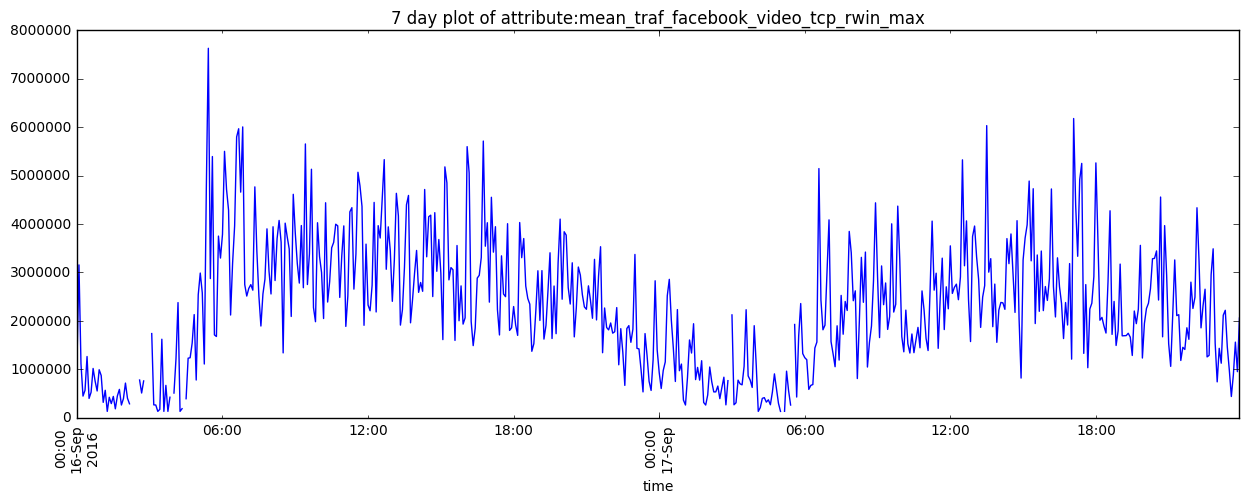

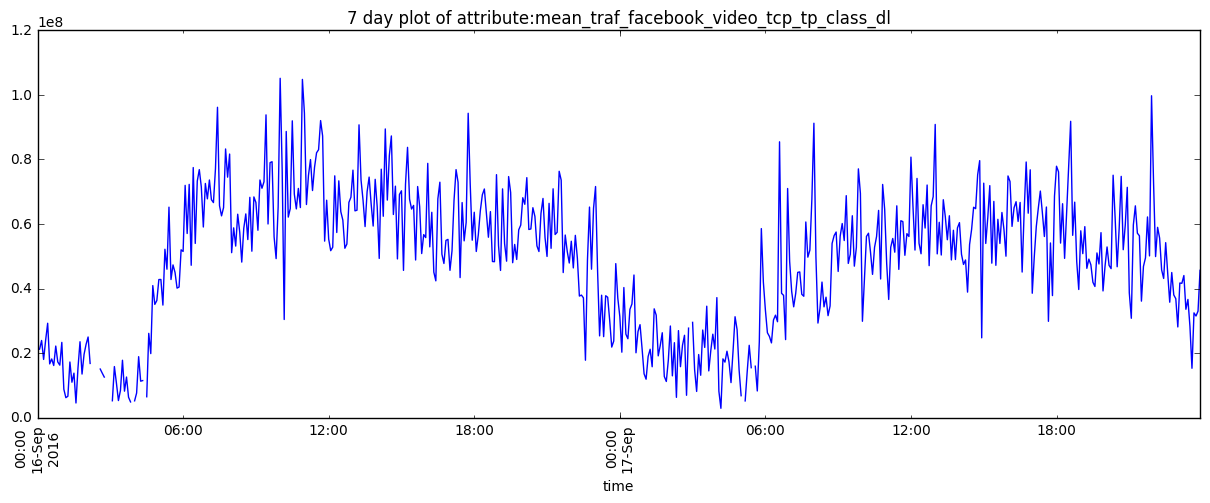

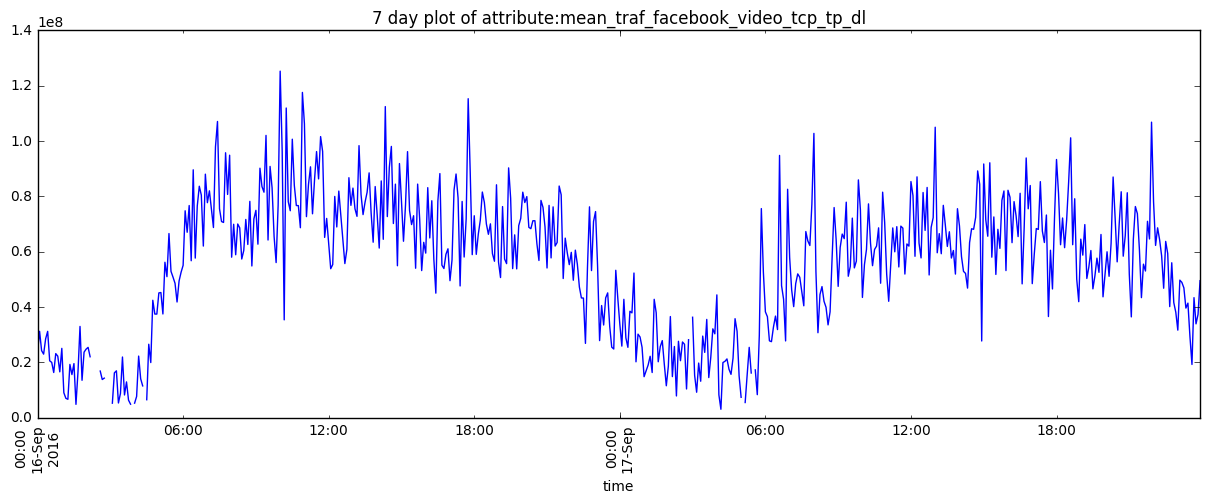

In [28]:
#plot 2 days data
df_2day = df['2016-09-16':'2016-09-17']
for col in df_2day:
    df_2day[col].plot(figsize=(15,5))
    plt.xticks(rotation='vertical')
    plt.title("7 day plot of attribute:"+ col)
    plt.show()

In [29]:
print df.head(5)
print df.tail(5)

                     no_records  unique_users  unique_active_users_dl  \
time                                                                    
2016-08-31 07:45:00        3506          2709                    1320   
2016-08-31 07:50:00        4462          2940                    1359   
2016-08-31 07:55:00        5075          3185                    1438   
2016-08-31 08:00:00        5038          3200                    1420   
2016-08-31 08:05:00        4989          3246                    1437   

                     unique_active_users_ul  active_traf_records_dl  \
time                                                                  
2016-08-31 07:45:00                    1360                    1388   
2016-08-31 07:50:00                    1404                    1503   
2016-08-31 07:55:00                    1480                    1586   
2016-08-31 08:00:00                    1462                    1581   
2016-08-31 08:05:00                    1500                   

In [30]:
df =df.fillna(0)
df.sum(axis=0)

no_records                                             3.816581e+07
unique_users                                           2.370091e+07
unique_active_users_dl                                 1.438620e+07
unique_active_users_ul                                 1.484693e+07
active_traf_records_dl                                 1.612194e+07
active_traf_records_ul                                 1.612194e+07
sum_btraf_bearer_bytes_dl                              7.706331e+12
sum_btraf_bearer_bytes_ul                              9.157613e+11
sum_kpi_core_create_pdp_response_time_samples          2.399900e+05
sum_kpi_core_create_pdp_same_ip_samples                1.500800e+04
sum_kpi_core_create_session_new_ip_samples             3.591010e+05
sum_kpi_core_create_session_response_time_samples      1.432823e+06
mean_kpi_core_create_session_response_time_val         1.963951e+04
sum_kpi_core_create_session_same_ip_samples            1.143356e+06
mean_kpi_core_modify_bearer_response_time_val   

In [31]:
np.save("../resources/data/peak_highdimension_Aug31_Oct16",df)

In [39]:
dataset = np.load("../resources/data/peak_highdimension_Aug31_Oct16.npy")

In [40]:
print dataset[:10,:]

[[  3.50600000e+03   2.70900000e+03   1.32000000e+03   1.36000000e+03
    1.38800000e+03   1.38800000e+03   1.93834178e+09   1.31526698e+08
    3.10000000e+01   2.00000000e+00   2.90000000e+01   1.28000000e+02
    1.19176335e+00   1.03000000e+02   3.09773497e-02   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.94551302e-02   1.57074530e+02
    6.05000000e+02   6.05000000e+02  -3.20122313e+01   1.40000000e+01
    1.19280200e+06   1.00374500e+06   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   3.39000000e+02   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   3.35247890e+07   5.73523000e+06
    7.13706742e-01   6.92873417e-01   8.33333000e-02   1.53301495e-01
    6.92605033e-02   3.57143000e-01   3.10113547e-01   5.47170855e-01
    4.46000000e+02   1.74717620e+07   1.68720000e+04   4.43825213e+06
    9.12751191e+07  

In [41]:


#use only for training data
#use returned scaler object to scale test data
def standardize(data):
    print data.shape
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    print "Scaler Mean: %s" % (scaler.mean_)
    print "Scaler Variance: %s" % (scaler.var_)
    return data,scaler

def get_peak_data(dataset,train_test_ratio = 0.7):
    #dataset = np.load("../resources/data/peak_multi_kpis_Aug31_Oct16.npy")
    train_size = int(len(dataset) * train_test_ratio)
    train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
    train,scaler = standardize(train)
    test = scaler.transform(test)
    return train, test, scaler

In [42]:
train, test ,scaler = get_peak_data(dataset,0.7)


(7656, 81)
Scaler Mean: [  3.57826385e+03   2.22350993e+03   1.33100758e+03   1.37285057e+03
   1.49832275e+03   1.49832275e+03   7.24593701e+08   8.49300017e+07
   2.28838819e+01   1.37813480e+00   3.42176071e+01   1.37625000e+02
   1.80374514e+00   1.10349399e+02   2.45747892e-02   6.98158307e+00
   3.26680181e+00   6.92672414e+00   1.66524975e-02   1.40422059e+02
   7.60183516e+02   7.60179598e+02  -2.88764827e+01   1.23050012e+01
   2.05022076e+06   1.68090275e+06   3.66273551e-02   3.62220482e-02
   7.34694945e-04   3.78183133e-03   3.26891523e-03   5.52381831e-04
   9.74195435e-03   3.60027720e-02   3.81226489e+02   3.94720837e+04
   1.37791245e+04   7.67822989e+04   6.04351257e+05   1.67864896e+05
   6.66801832e+05   1.70578484e+05   4.84458133e+07   7.68409443e+06
   5.27936736e-01   5.00701900e-01   1.07622845e-01   3.11032068e-02
   2.04844139e-02   4.79832436e-02   3.76640096e-01   7.96661230e-01
   5.10532393e+02   2.74549740e+07   1.71981045e+06   4.04262680e+06
   7.13856

In [43]:
print train.shape
print test.shape

(7656, 81)
(3282, 81)


In [44]:
np.save("../resources/data/peak_highdimension_Aug31_Oct16_scaled_train",train)
np.save("../resources/data/peak_highdimension_Aug31_Oct16_scaled_test",test)

In [ ]:
layers={'input': 21, 'hidden1': 100, 'hidden2': 500, 'hidden3': 100, 'hidden4':30 ,'output': 1}
n_hidden=3
dropout = 0.4
optimizer = 'rmsprop'
loss = 'mse'

In [ ]:
model = Sequential()
model.add(LSTM(
            input_length=look_back,
            input_dim=layers['input'],
            output_dim=layers['hidden1'],
            return_sequences=True))
model.add(Dropout(dropout))

#add hidden layers
for i in range(2,n_hidden+1):
    return_sequences = True
    if i == n_hidden:
        return_sequences = False
    model.add(LSTM(layers["hidden"+str(i)],return_sequences=return_sequences))
    model.add(Dropout(dropout))

#add dense layer with output dimension to get output for one time_step
model.add(Dense(output_dim=layers['output']))

#Repeat for look_ahead steps to get outputs for look_ahead timesteps.
model.add(RepeatVector(look_ahead))

#add activation
model.add(Activation("linear"))

# compile model and print summary
start = time.time()
model.compile(loss=loss, optimizer=optimizer)
model.summary()

In [ ]:
model.fit(trainX, trainY,batch_size=1024, nb_epoch=5, validation_split=0.05,shuffle=False,verbose=2)


In [ ]:
model.evaluate(testX, testY, batch_size=1024, verbose=2)

In [ ]:
testPredictions = model.predict(testX)
print testPredictions.shape
print testPredictions[:5]
print testPredictions[:,0,0]

In [ ]:
testY_1 = testY[:, 0]
testY_1 = testY_1.flatten()
print testY_1[:5]

In [ ]:
plt.title("Prediction on test data t+1 timestep")
plt.plot(testY_1,label = "actual",linewidth=1)
plt.plot(testPredictions[:,0,0],label = "prediction",linewidth=1,linestyle="--")
error = ((testY_1 - testPredictions[:,0,0]))
plt.plot(error, label = "error",linewidth=0.5)
plt.legend()
plt.show()